In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mind-news-dataset/MINDsmall_train/entity_embedding.vec
/kaggle/input/mind-news-dataset/MINDsmall_train/relation_embedding.vec
/kaggle/input/mind-news-dataset/MINDsmall_train/news.tsv
/kaggle/input/mind-news-dataset/MINDsmall_train/behaviors.tsv
/kaggle/input/mind-news-dataset/news.tsv/news.tsv


In [2]:
behaviors = pd.read_csv(r'/kaggle/input/mind-news-dataset/MINDsmall_train/behaviors.tsv')
behaviors

,1\tU13740\t11/11/2019 9:05:58 AM\tN55189 N42782 N34694 N45794 N18445 N63302 N10414 N19347 N31801\tN55689-1 N35729-0
0,2\tU91836\t11/12/2019 6:11:30 PM\tN31739 N6072...
1,3\tU73700\t11/14/2019 7:01:48 AM\tN10732 N2579...
2,4\tU34670\t11/11/2019 5:28:05 AM\tN45729 N2203...
3,5\tU8125\t11/12/2019 4:11:21 PM\tN10078 N56514...
4,6\tU19739\t11/11/2019 6:52:13 PM\tN39074 N1434...
...,...
156959,156961\tU21593\t11/14/2019 10:24:05 PM\tN7432 ...
156960,156962\tU10123\t11/13/2019 6:57:04 AM\tN9803 N...
156961,156963\tU75630\t11/14/2019 10:58:13 AM\tN29898...
156962,156964\tU44625\t11/13/2019 2:57:02 PM\tN4118 N...


In [3]:
 

# Path to the behaviors.tsv file
behaviors_path = '/kaggle/input/mind-news-dataset/MINDsmall_train/behaviors.tsv'

# Define column names as described in the dataset documentation
columns = ["Impression ID", "User ID", "Time", "History", "Impressions"]

# Load the TSV into a DataFrame
behaviors_df = pd.read_csv(behaviors_path, sep='\t', names=columns)

# Display the DataFrame structure and the first few rows
print("DataFrame created from behaviors.tsv:")
print(behaviors_df.head())

# Additional steps to confirm the data is in the desired format
print("\nDataFrame Info:")
print(behaviors_df.info())


DataFrame created from behaviors.tsv:
   Impression ID User ID                   Time  \
0              1  U13740  11/11/2019 9:05:58 AM   
1              2  U91836  11/12/2019 6:11:30 PM   
2              3  U73700  11/14/2019 7:01:48 AM   
3              4  U34670  11/11/2019 5:28:05 AM   
4              5   U8125  11/12/2019 4:11:21 PM   

                                             History  \
0  N55189 N42782 N34694 N45794 N18445 N63302 N104...   
1  N31739 N6072 N63045 N23979 N35656 N43353 N8129...   
2  N10732 N25792 N7563 N21087 N41087 N5445 N60384...   
3  N45729 N2203 N871 N53880 N41375 N43142 N33013 ...   
4                        N10078 N56514 N14904 N33740   

                                         Impressions  
0                                  N55689-1 N35729-0  
1  N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...  
2  N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...  
3                N35729-0 N33632-0 N49685-1 N27581-0  
4  N39985-0 N36050-0 N16096-0 N8400-1 N2240

In [4]:
behaviors_df

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [5]:
import pandas as pd

# Define the file path
news_path = r'/kaggle/input/mind-news-dataset/MINDsmall_train/news.tsv'

# Define column names based on the dataset description
columns = [
    "News ID",
    "Category",
    "SubCategory",
    "Title",
    "Abstract",
    "URL",
    "Title Entities",
    "Abstract Entities"
]

# Load the TSV file into a DataFrame
news_df = pd.read_csv(news_path, sep='\t', names=columns)
news_df

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://assets.msn.com/labs/mind/BBWzQJK.html,"[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...","[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid..."
51278,N47585,lifestyle,lifestylefamily,Family says 13-year-old Broadway star died fro...,NaN,https://assets.msn.com/labs/mind/BBWzQYV.html,"[{""Label"": ""Broadway theatre"", ""Type"": ""F"", ""W...",[]
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",https://assets.msn.com/labs/mind/BBWzQnK.html,[],[]
51280,N34418,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",https://assets.msn.com/labs/mind/BBWzQuK.html,"[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[]


In [6]:
# Check for null values
null_values = news_df.isnull().sum()

# Check for duplicate rows
duplicate_rows = news_df.duplicated().sum()

# Display results
print("Null Values in Each Column:")
print(null_values)

print("\nNumber of Duplicate Rows:")
print(duplicate_rows)

Null Values in Each Column:
News ID                 0
Category                0
SubCategory             0
Title                   0
Abstract             2666
URL                     0
Title Entities          3
Abstract Entities       4
dtype: int64

Number of Duplicate Rows:
0


In [7]:
# Replace missing abstracts with a placeholder
news_df['Abstract'].fillna("No abstract available", inplace=True)

# Replace missing entities with an empty string
news_df['Title Entities'].fillna("", inplace=True)
news_df['Abstract Entities'].fillna("", inplace=True)

# Verify that there are no null values left
print("Null Values After Handling:")
print(news_df.isnull().sum())


Null Values After Handling:
News ID              0
Category             0
SubCategory          0
Title                0
Abstract             0
URL                  0
Title Entities       0
Abstract Entities    0
dtype: int64


/tmp/ipykernel_17/4155883276.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  news_df['Abstract'].fillna("No abstract available", inplace=True)
/tmp/ipykernel_17/4155883276.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [8]:
behaviors_df.dtypes

Impression ID     int64
User ID          object
Time             object
History          object
Impressions      object
dtype: object

In [9]:
behaviors_df

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [10]:
# Check for null values in each column
null_values_behaviors = behaviors_df.isnull().sum()

# Check for duplicate rows
duplicate_rows_behaviors = behaviors_df.duplicated().sum()

# Display the results
print("Null Values in Each Column (behaviors_df):")
print(null_values_behaviors)
print("\nNumber of Duplicate Rows (behaviors_df):", duplicate_rows_behaviors)


Null Values in Each Column (behaviors_df):
Impression ID       0
User ID             0
Time                0
History          3238
Impressions         0
dtype: int64

Number of Duplicate Rows (behaviors_df): 0


In [11]:
behaviors_df.dropna(subset=['History'], inplace=True)


In [12]:
behaviors_df

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [13]:
behaviors_df.dtypes

Impression ID     int64
User ID          object
Time             object
History          object
Impressions      object
dtype: object

In [14]:
news_df.dtypes

News ID              object
Category             object
SubCategory          object
Title                object
Abstract             object
URL                  object
Title Entities       object
Abstract Entities    object
dtype: object

In [15]:
# Remove duplicates in behaviors_df
behaviors_df = behaviors_df.drop_duplicates()

# Remove duplicates in news_df
news_df = news_df.drop_duplicates()


In [16]:
news_df

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://assets.msn.com/labs/mind/BBWzQJK.html,"[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...","[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid..."
51278,N47585,lifestyle,lifestylefamily,Family says 13-year-old Broadway star died fro...,No abstract available,https://assets.msn.com/labs/mind/BBWzQYV.html,"[{""Label"": ""Broadway theatre"", ""Type"": ""F"", ""W...",[]
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",https://assets.msn.com/labs/mind/BBWzQnK.html,[],[]
51280,N34418,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",https://assets.msn.com/labs/mind/BBWzQuK.html,"[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[]


In [17]:
! pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.5 MB/s eta 0:00:00


In [18]:
import pandas as pd
import random
from faker import Faker

# Initialize Faker
fake = Faker()

# Group Abstracts, Titles, URLs, and Categories together
category_data = news_df.groupby('Category')[['Title', 'Abstract', 'URL']].apply(lambda x: x.to_dict('records')).to_dict()

# Define number of synthetic instances
num_instances = 3500

# Generate synthetic dataset
synthetic_data = []
categories = list(category_data.keys())

# Track used records per category to avoid repetitions (store tuples instead of dictionaries)
used_records_per_category = {category: set() for category in categories}

for i in range(num_instances):
    # Randomly choose a category
    category = random.choice(categories)
    
    # Filter out used records to minimize repetition by converting record to a tuple of values
    available_records = [record for record in category_data[category] 
                         if tuple(record.items()) not in used_records_per_category[category]]
    
    # If no unused records are available, reset the used records for that category
    if not available_records:
        used_records_per_category[category].clear()
        available_records = category_data[category]
    
    # Randomly pick a record (Title, Abstract, URL) from the available records
    record = random.choice(available_records)
    
    # Mark this record as used (convert it to a tuple)
    used_records_per_category[category].add(tuple(record.items()))
    
    # Generate realistic user data using Faker
    synthetic_data.append({
        "News ID": f"SYN_{i+1}",
        "Title": record['Title'],  # Title matches the chosen category
        "Abstract": record['Abstract'],  # Abstract matches the chosen category
        "URL": record['URL'],  # URL matches the chosen Abstract
        "User ID": fake.user_name(),  # Realistic usernames
        "Email": fake.email(),  # User's email address
        "Location": fake.city(),  # User's city
        "Category": category,  # Use the chosen category
        "Rating": random.randint(1, 5),  # Simulated rating
        "Clicks": random.choice([0, 1]),  # Click behavior
        "Time Spent (seconds)": round(random.uniform(5, 300), 2),  # Random time spent
    })

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Save to CSV
synthetic_df.to_csv("synthetic_news_data.csv", index=False)

# Display the first few rows to verify
synthetic_df.head()


,News ID,Title,Abstract,URL,User ID,Email,Location,Category,Rating,Clicks,Time Spent (seconds)
0,SYN_1,"Hilary Duff, Matthew Koma Wish Daughter Happy ...","Hilary Duff, Matthew Koma Wish Daughter Happy ...",https://assets.msn.com/labs/mind/AAJmJRN.html,adamstaylor,zcollier@example.com,Kimberlyshire,tv,1,1,256.20
1,SYN_2,'It just crushed me' says Dallas man who held ...,A Dallas man is counting his blessings and cre...,https://assets.msn.com/labs/mind/AAJgBv5.html,melanie87,jared56@example.org,Samanthahaven,weather,3,1,46.61
2,SYN_3,The best football movies of all time,Check out our favorite football films!,https://assets.msn.com/labs/mind/AAI7lm0.html,amber20,qbaker@example.net,Port Jeffreyfort,movies,5,0,145.90
3,SYN_4,Sherwin-Williams is Cleveland. And Cleveland n...,CLEVELAND -- Sherwin-Williams paint may cover ...,https://assets.msn.com/labs/mind/BBWKSnz.html,kristopher55,thomassnyder@example.com,Millerberg,finance,5,0,280.26
4,SYN_5,Student's drone footage shows whale swimming a...,18-year-old Payton Landaas flew his drone abov...,https://assets.msn.com/labs/mind/BBWLgOl.html,howardpaul,mperez@example.net,North John,kids,5,1,77.97


In [19]:
# Rename synthetic_df to recomm_df
recomm_df = synthetic_df

# Display the DataFrame info to confirm the change
recomm_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   News ID               3500 non-null   object 
 1   Title                 3500 non-null   object 
 2   Abstract              3500 non-null   object 
 3   URL                   3500 non-null   object 
 4   User ID               3500 non-null   object 
 5   Email                 3500 non-null   object 
 6   Location              3500 non-null   object 
 7   Category              3500 non-null   object 
 8   Rating                3500 non-null   int64  
 9   Clicks                3500 non-null   int64  
 10  Time Spent (seconds)  3500 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 300.9+ KB


In [20]:
# Find duplicates in recomm_df
duplicates = recomm_df[recomm_df.duplicated()]

# Display duplicates
duplicates


,News ID,Title,Abstract,URL,User ID,Email,Location,Category,Rating,Clicks,Time Spent (seconds)


In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming recomm_df is your dataset

# Combine Title and Abstract into a single content column for content-based filtering
recomm_df['content'] = recomm_df['Title'] + ' ' + recomm_df['Abstract']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the content to get the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(recomm_df['content'])

# Compute the cosine similarity between all articles based on the TF-IDF matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on a given article
def get_recommendations(news_id, cosine_sim=cosine_sim):
    # Find the index of the article that matches the news_id
    idx = recomm_df.index[recomm_df['News ID'] == news_id].tolist()[0]
    
    # Get the pairwise similarity scores for all articles with that article
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the articles based on the similarity scores (in descending order)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 most similar articles (excluding the article itself)
    sim_scores = sim_scores[1:11]
    
    # Get the indices of the most similar articles
    article_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar articles
    return recomm_df.iloc[article_indices][['News ID', 'Title', 'Abstract', 'URL']]

# Example: Get recommendations for an article with a specific News ID
news_id = 'SYN_1'  # Replace with a specific News ID
recommendations = get_recommendations(news_id)

# Display the recommendations
recommendations


,News ID,Title,Abstract,URL
3103,SYN_3104,Matthew Koma's New Tattoo for His Kids Will Me...,Matthew Koma's New Tattoo for His Kids Will Me...,https://assets.msn.com/labs/mind/BBWHNlJ.html
45,SYN_46,"Jennifer Aniston, Hilary Duff, Megan Fox and M...",No abstract available,https://assets.msn.com/labs/mind/AAJ1QaM.html
736,SYN_737,'Lizzie McGuire's' Family Joins Hilary Duff's ...,The Original 'Lizzie McGuire' family is reunit...,https://assets.msn.com/labs/mind/AAJkihN.html
1190,SYN_1191,Dad turns made-up bedtime story into a real bo...,A California dad brought his daughter to tears...,https://assets.msn.com/labs/mind/BBWsRlY.html
2265,SYN_2266,See Vin Diesel's 21st birthday post to Paul Wa...,The Fast & Furious franchise star has remained...,https://assets.msn.com/labs/mind/AAJTn3P.html
2087,SYN_2088,Great Dane isn't happy when dinner plans change,Sirius wasn't very happy to find out that dinn...,https://assets.msn.com/labs/mind/AAJZMRv.html
2759,SYN_2760,Adobe deals with 'painful' early reviews of Ph...,"'If you try to make everybody happy w/ a v1, y...",https://assets.msn.com/labs/mind/BBWtL8e.html
445,SYN_446,"If the Eagles want Josh Gordon, they'll have t...",So you're saying there's a chance ...,https://assets.msn.com/labs/mind/AAJEX40.html
621,SYN_622,Step Aside Jennifer Aniston: Matthew McConaugh...,Matthew McConaughey officially joins Instagram...,https://assets.msn.com/labs/mind/AAJQQKV.html
725,SYN_726,40 Habits Doctors Wish You'd Adopt After 40,Want to live a long and happy life? Here are a...,https://assets.msn.com/labs/mind/AAIqFet.html


In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Assuming recomm_df is already defined
# Combine Title and Abstract into a single content column
recomm_df['content'] = recomm_df['Title'] + ' ' + recomm_df['Abstract']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the content to get the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(recomm_df['content'])

# Apply LSA (SVD) for dimensionality reduction
lsa = TruncatedSVD(n_components=100, random_state=42)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Function to get recommendations based on a given News ID
def get_recommendations(news_id, recomm_df=recomm_df, lsa_matrix=lsa_matrix, top_n=10):
    # Find the index of the article that matches the News ID
    idx = recomm_df.index[recomm_df['News ID'] == news_id].tolist()[0]
    
    # Get the LSA vector for the given article
    article_vector = lsa_matrix[idx]
    
    # Compute cosine similarities between the given article and all other articles
    similarities = cosine_similarity([article_vector], lsa_matrix)
    
    # Sort the articles by similarity and return the top N
    similar_indices = similarities[0].argsort()[-(top_n+1):-1][::-1]  # Excluding itself
    
    # Return the top N most similar articles
    return recomm_df.iloc[similar_indices][['News ID', 'Title', 'Abstract', 'URL', 'Category', 'Rating']]

# Example usage: Get top 10 recommendations for a specific article (by News ID)
news_id = 'SYN_1'  # Replace with a specific News ID in your dataset
recommendations = get_recommendations(news_id)

# Display the recommendations
print(recommendations)


       News ID                                              Title  \
1555  SYN_1556  Miguel Cervantes Pays Tribute to Daughter on W...   
2822  SYN_2823  Miranda Lambert Shares Birthday Post for Brend...   
2265  SYN_2266  See Vin Diesel's 21st birthday post to Paul Wa...   
711    SYN_712  Ciara Celebrates 34th Birthday with Husband Ru...   
1206  SYN_1207  Luke Perry's Kids, Sophie and Jack, Post Heart...   
2447  SYN_2448  Simone Biles Shares Sweet Birthday Tribute for...   
1190  SYN_1191  Dad turns made-up bedtime story into a real bo...   
945    SYN_946  Staying Friends! Hannah Brown Reacts to Tyler ...   
1049  SYN_1050  BEL MOONEY: I'm so hurt by 'friends' who baile...   
2551  SYN_2552  Why Hoda Kotb Returned to 'Today' Following Da...   

                                               Abstract  \
1555  See the actor's touching post marking the somb...   
2822  Miranda Lambert Shares Sweet Birthday Post for...   
2265  The Fast & Furious franchise star has remained...   
711 

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Assuming recomm_df is already defined
# Combine Title and Abstract into a single content column
recomm_df['content'] = recomm_df['Title'] + ' ' + recomm_df['Abstract']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the content to get the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(recomm_df['content'])

# Apply LSA (SVD) for dimensionality reduction
lsa = TruncatedSVD(n_components=100, random_state=42)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Function to get recommendations based on a given News ID
def get_recommendations(news_id, recomm_df=recomm_df, lsa_matrix=lsa_matrix, top_n=10):
    # Find the index of the article that matches the News ID
    idx = recomm_df.index[recomm_df['News ID'] == news_id].tolist()[0]
    
    # Get the LSA vector for the given article
    article_vector = lsa_matrix[idx]
    
    # Compute cosine similarities between the given article and all other articles
    similarities = cosine_similarity([article_vector], lsa_matrix)
    
    # Sort the articles by similarity and return the top N
    similar_indices = similarities[0].argsort()[-(top_n+1):-1][::-1]  # Excluding itself
    
    # Get the similarity scores for the top N recommendations
    similar_scores = similarities[0][similar_indices]
    
    # Return the top N most similar articles along with their similarity scores
    recommendations = recomm_df.iloc[similar_indices][['News ID', 'Title', 'Abstract', 'URL', 'Category', 'Rating']]
    recommendations['Similarity Score'] = similar_scores
    
    return recommendations

# Example usage: Get top 10 recommendations for a specific article (by News ID)
news_id = 'SYN_1'  # Replace with a specific News ID in your dataset
recommendations = get_recommendations(news_id)

# Display the recommendations along with similarity scores
recommendations


,News ID,Title,Abstract,URL,Category,Rating,Similarity Score
1555,SYN_1556,Miguel Cervantes Pays Tribute to Daughter on W...,See the actor's touching post marking the somb...,https://assets.msn.com/labs/mind/AAIWxpa.html,tv,1,0.788022
2822,SYN_2823,Miranda Lambert Shares Birthday Post for Brend...,Miranda Lambert Shares Sweet Birthday Post for...,https://assets.msn.com/labs/mind/AAILLXl.html,music,3,0.752665
2265,SYN_2266,See Vin Diesel's 21st birthday post to Paul Wa...,The Fast & Furious franchise star has remained...,https://assets.msn.com/labs/mind/AAJTn3P.html,movies,2,0.735794
711,SYN_712,Ciara Celebrates 34th Birthday with Husband Ru...,Ciara Celebrates 34th Birthday with Husband Ru...,https://assets.msn.com/labs/mind/AAJmYm3.html,music,4,0.686453
1206,SYN_1207,"Luke Perry's Kids, Sophie and Jack, Post Heart...",The 'Riverdale' star died in March of a massiv...,https://assets.msn.com/labs/mind/AAIFMil.html,tv,3,0.678664
2447,SYN_2448,Simone Biles Shares Sweet Birthday Tribute for...,The accomplished gymnast has a lot to celebrat...,https://assets.msn.com/labs/mind/AAJ7Kt4.html,entertainment,4,0.667357
1190,SYN_1191,Dad turns made-up bedtime story into a real bo...,A California dad brought his daughter to tears...,https://assets.msn.com/labs/mind/BBWsRlY.html,video,1,0.654074
945,SYN_946,Staying Friends! Hannah Brown Reacts to Tyler ...,Staying Friends! Hannah Brown Reacts to Tyler ...,https://assets.msn.com/labs/mind/AAJaHT4.html,tv,5,0.638213
1049,SYN_1050,BEL MOONEY: I'm so hurt by 'friends' who baile...,This week Bel advises a reader who feels hurt ...,https://assets.msn.com/labs/mind/AAItkOO.html,lifestyle,2,0.625909
2551,SYN_2552,Why Hoda Kotb Returned to 'Today' Following Da...,Hoda Kotb's maternity leave ended in September...,https://assets.msn.com/labs/mind/AAItgRt.html,tv,2,0.609124


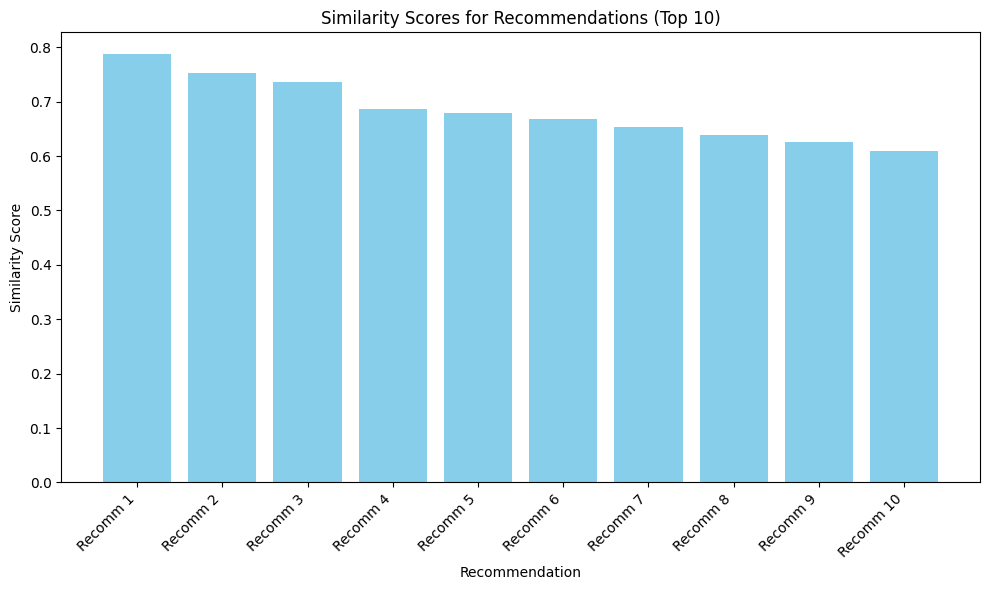

       News ID                                              Title  \
1555  SYN_1556  Miguel Cervantes Pays Tribute to Daughter on W...   
2822  SYN_2823  Miranda Lambert Shares Birthday Post for Brend...   
2265  SYN_2266  See Vin Diesel's 21st birthday post to Paul Wa...   
711    SYN_712  Ciara Celebrates 34th Birthday with Husband Ru...   
1206  SYN_1207  Luke Perry's Kids, Sophie and Jack, Post Heart...   
2447  SYN_2448  Simone Biles Shares Sweet Birthday Tribute for...   
1190  SYN_1191  Dad turns made-up bedtime story into a real bo...   
945    SYN_946  Staying Friends! Hannah Brown Reacts to Tyler ...   
1049  SYN_1050  BEL MOONEY: I'm so hurt by 'friends' who baile...   
2551  SYN_2552  Why Hoda Kotb Returned to 'Today' Following Da...   

                                               Abstract  \
1555  See the actor's touching post marking the somb...   
2822  Miranda Lambert Shares Sweet Birthday Post for...   
2265  The Fast & Furious franchise star has remained...   
711 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Assuming recomm_df is already defined
# Combine Title and Abstract into a single content column
recomm_df['content'] = recomm_df['Title'] + ' ' + recomm_df['Abstract']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the content to get the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(recomm_df['content'])

# Apply LSA (SVD) for dimensionality reduction
lsa = TruncatedSVD(n_components=100, random_state=42)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Function to get recommendations based on a given News ID
def get_recommendations(news_id, recomm_df=recomm_df, lsa_matrix=lsa_matrix, top_n=10):
    # Find the index of the article that matches the News ID
    idx = recomm_df.index[recomm_df['News ID'] == news_id].tolist()[0]
    
    # Get the LSA vector for the given article
    article_vector = lsa_matrix[idx]
    
    # Compute cosine similarities between the given article and all other articles
    similarities = cosine_similarity([article_vector], lsa_matrix)
    
    # Sort the articles by similarity and return the top N
    similar_indices = similarities[0].argsort()[-(top_n+1):-1][::-1]  # Excluding itself
    
    # Get the similarity scores for the top N recommendations
    similar_scores = similarities[0][similar_indices]
    
    # Return the top N most similar articles along with their similarity scores
    recommendations = recomm_df.iloc[similar_indices][['News ID', 'Title', 'Abstract', 'URL', 'Category', 'Rating']]
    recommendations['Similarity Score'] = similar_scores
    
    # Plot the similarity scores as a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, top_n+1), similar_scores, color='skyblue')
    plt.xticks(range(1, top_n+1), [f'Recomm {i}' for i in range(1, top_n+1)], rotation=45, ha="right")
    plt.title(f'Similarity Scores for Recommendations (Top {top_n})')
    plt.xlabel('Recommendation')
    plt.ylabel('Similarity Score')
    
    # Adjust the layout to prevent label overlap
    plt.tight_layout()
    
    plt.show()
    
    return recommendations

# Example usage: Get top 10 recommendations for a specific article (by News ID)
news_id = 'SYN_1'  # Replace with a specific News ID in your dataset
recommendations = get_recommendations(news_id)

# Display the recommendations along with similarity scores
print(recommendations)


In [25]:
duplicates_specific_columns = recomm_df[recomm_df.duplicated(subset=['Title', 'Abstract'])]
duplicates_specific_columns


,News ID,Title,Abstract,URL,User ID,Email,Location,Category,Rating,Clicks,Time Spent (seconds),content
20,SYN_21,Republicans have floated 17 different defenses...,Since the House formally launched the impeachm...,https://assets.msn.com/labs/mind/BBWFdBy.html,warrenmichael,miranda90@example.net,South Brittanyview,northamerica,2,1,227.52,Republicans have floated 17 different defenses...
26,SYN_27,Republicans have floated 17 different defenses...,Since the House formally launched the impeachm...,https://assets.msn.com/labs/mind/BBWFdBy.html,ucook,andrea16@example.net,East Yvonneview,northamerica,1,0,86.67,Republicans have floated 17 different defenses...
28,SYN_29,Republicans have floated 17 different defenses...,Since the House formally launched the impeachm...,https://assets.msn.com/labs/mind/BBWFdBy.html,vjackson,gibsonsteven@example.com,Brownchester,northamerica,5,0,298.97,Republicans have floated 17 different defenses...
33,SYN_34,Republicans have floated 17 different defenses...,Since the House formally launched the impeachm...,https://assets.msn.com/labs/mind/BBWFdBy.html,pricejames,xfigueroa@example.net,Wallaceberg,northamerica,2,0,260.23,Republicans have floated 17 different defenses...
37,SYN_38,Republicans have floated 17 different defenses...,Since the House formally launched the impeachm...,https://assets.msn.com/labs/mind/BBWFdBy.html,carrolltammy,tracy54@example.org,Pamelaside,northamerica,5,1,71.76,Republicans have floated 17 different defenses...
...,...,...,...,...,...,...,...,...,...,...,...,...
3481,SYN_3482,Republicans have floated 17 different defenses...,Since the House formally launched the impeachm...,https://assets.msn.com/labs/mind/BBWFdBy.html,bartonkatherine,brendajones@example.org,Smithshire,northamerica,1,1,34.40,Republicans have floated 17 different defenses...
3484,SYN_3485,Republicans have floated 17 different defenses...,Since the House formally launched the impeachm...,https://assets.msn.com/labs/mind/BBWFdBy.html,davidsontroy,ddavis@example.org,Lake Davidshire,northamerica,5,1,213.55,Republicans have floated 17 different defenses...
3492,SYN_3493,Why do people love to eat pizza? The answer is...,The combinations and the cooking process enhan...,https://assets.msn.com/labs/mind/AAJQ1kg.html,denise91,bramos@example.net,North Collinborough,kids,2,1,154.74,Why do people love to eat pizza? The answer is...
3493,SYN_3494,"Rocket falls in Baghdad's Green Zone, killing one",A rocket fell inside Baghdad's heavily fortifi...,https://assets.msn.com/labs/mind/AAJBApe.html,cheryl70,thomasstephen@example.net,West Ericfort,middleeast,3,1,18.10,"Rocket falls in Baghdad's Green Zone, killing ..."


In [26]:
# Removing duplicates based on 'Title' and 'Abstract'
recomm_df_no_duplicates = recomm_df.drop_duplicates(subset=['Title', 'Abstract'], keep='first')

# To check the shape after removing duplicates
print(f"Shape after removing duplicates: {recomm_df_no_duplicates.shape}")


Shape after removing duplicates: (2865, 12)


In [27]:
recomm_data = recomm_df_no_duplicates
recomm_data

,News ID,Title,Abstract,URL,User ID,Email,Location,Category,Rating,Clicks,Time Spent (seconds),content
0,SYN_1,"Hilary Duff, Matthew Koma Wish Daughter Happy ...","Hilary Duff, Matthew Koma Wish Daughter Happy ...",https://assets.msn.com/labs/mind/AAJmJRN.html,adamstaylor,zcollier@example.com,Kimberlyshire,tv,1,1,256.20,"Hilary Duff, Matthew Koma Wish Daughter Happy ..."
1,SYN_2,'It just crushed me' says Dallas man who held ...,A Dallas man is counting his blessings and cre...,https://assets.msn.com/labs/mind/AAJgBv5.html,melanie87,jared56@example.org,Samanthahaven,weather,3,1,46.61,'It just crushed me' says Dallas man who held ...
2,SYN_3,The best football movies of all time,Check out our favorite football films!,https://assets.msn.com/labs/mind/AAI7lm0.html,amber20,qbaker@example.net,Port Jeffreyfort,movies,5,0,145.90,The best football movies of all time Check out...
3,SYN_4,Sherwin-Williams is Cleveland. And Cleveland n...,CLEVELAND -- Sherwin-Williams paint may cover ...,https://assets.msn.com/labs/mind/BBWKSnz.html,kristopher55,thomassnyder@example.com,Millerberg,finance,5,0,280.26,Sherwin-Williams is Cleveland. And Cleveland n...
4,SYN_5,Student's drone footage shows whale swimming a...,18-year-old Payton Landaas flew his drone abov...,https://assets.msn.com/labs/mind/BBWLgOl.html,howardpaul,mperez@example.net,North John,kids,5,1,77.97,Student's drone footage shows whale swimming a...
...,...,...,...,...,...,...,...,...,...,...,...,...
3494,SYN_3495,U.S. troops remain in Syria to protect oil fields,Donald Trump has pledged to end what he calls ...,https://assets.msn.com/labs/mind/AAJp2QF.html,jamesolson,michaelwilliams@example.net,Zimmermanfurt,video,1,1,129.20,U.S. troops remain in Syria to protect oil fie...
3495,SYN_3496,Going Dairy-Free Doesn't Have to Be Complicate...,Thinking of trying out a dairy free diet? Regi...,https://assets.msn.com/labs/mind/AAIEpNW.html,robertcastro,castillotodd@example.net,Lake Tyler,health,5,1,231.73,Going Dairy-Free Doesn't Have to Be Complicate...
3497,SYN_3498,Photos from space reveal what climate change l...,"Extreme weather events like hurricanes, drough...",https://assets.msn.com/labs/mind/BBWqqYp.html,wayne83,jennifer39@example.org,Wallaceborough,weather,4,1,134.46,Photos from space reveal what climate change l...
3498,SYN_3499,2020 Nissan Titan XD Has Stronger Bones and Mo...,"The Cummins diesel is gone, but the V-8 engine...",https://assets.msn.com/labs/mind/AAJ7FWQ.html,paul48,erintorres@example.com,Smithfort,autos,5,1,34.45,2020 Nissan Titan XD Has Stronger Bones and Mo...


/tmp/ipykernel_17/1014285464.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recomm_data['content'] = recomm_data['Title'] + ' ' + recomm_data['Abstract']


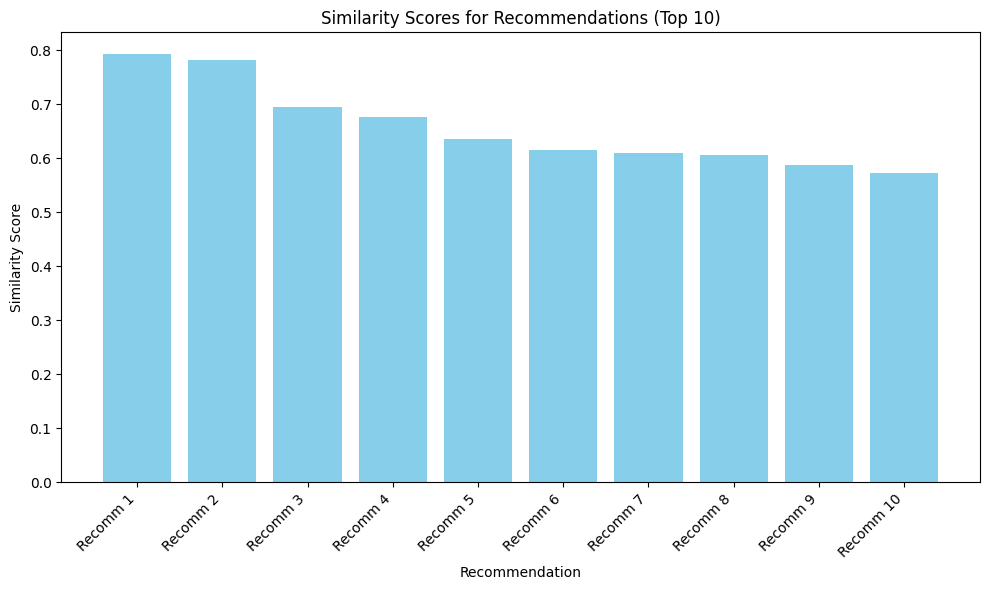

       News ID                                              Title  \
1555  SYN_1556  Miguel Cervantes Pays Tribute to Daughter on W...   
2265  SYN_2266  See Vin Diesel's 21st birthday post to Paul Wa...   
2822  SYN_2823  Miranda Lambert Shares Birthday Post for Brend...   
1190  SYN_1191  Dad turns made-up bedtime story into a real bo...   
2447  SYN_2448  Simone Biles Shares Sweet Birthday Tribute for...   
2551  SYN_2552  Why Hoda Kotb Returned to 'Today' Following Da...   
1049  SYN_1050  BEL MOONEY: I'm so hurt by 'friends' who baile...   
2219  SYN_2220  Watch Miranda Lambert Invite a Little Girl On ...   
1206  SYN_1207  Luke Perry's Kids, Sophie and Jack, Post Heart...   
1291  SYN_1292  Kendall Jenner's famous friends and family cel...   

                                               Abstract  \
1555  See the actor's touching post marking the somb...   
2265  The Fast & Furious franchise star has remained...   
2822  Miranda Lambert Shares Sweet Birthday Post for...   
1190

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Assuming recomm_df is already defined
# Combine Title and Abstract into a single content column
recomm_data['content'] = recomm_data['Title'] + ' ' + recomm_data['Abstract']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the content to get the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(recomm_data['content'])

# Apply LSA (SVD) for dimensionality reduction
lsa = TruncatedSVD(n_components=100, random_state=42)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Function to get recommendations based on a given News ID
def get_recommendations(news_id, recomm_data=recomm_data, lsa_matrix=lsa_matrix, top_n=10):
    # Find the index of the article that matches the News ID
    idx = recomm_data.index[recomm_data['News ID'] == news_id].tolist()[0]
    
    # Get the LSA vector for the given article
    article_vector = lsa_matrix[idx]
    
    # Compute cosine similarities between the given article and all other articles
    similarities = cosine_similarity([article_vector], lsa_matrix)
    
    # Sort the articles by similarity and return the top N
    similar_indices = similarities[0].argsort()[-(top_n+1):-1][::-1]  # Excluding itself
    
    # Get the similarity scores for the top N recommendations
    similar_scores = similarities[0][similar_indices]
    
    # Return the top N most similar articles along with their similarity scores
    recommendations = recomm_data.iloc[similar_indices][['News ID', 'Title', 'Abstract', 'URL', 'Category', 'Rating']]
    recommendations['Similarity Score'] = similar_scores
    
    # Plot the similarity scores as a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, top_n+1), similar_scores, color='skyblue')
    plt.xticks(range(1, top_n+1), [f'Recomm {i}' for i in range(1, top_n+1)], rotation=45, ha="right")
    plt.title(f'Similarity Scores for Recommendations (Top {top_n})')
    plt.xlabel('Recommendation')
    plt.ylabel('Similarity Score')
    
    # Adjust the layout to prevent label overlap
    plt.tight_layout()
    
    plt.show()
    
    return recommendations

# Example usage: Get top 10 recommendations for a specific article (by News ID)
news_id = 'SYN_1'  # Replace with a specific News ID in your dataset
recommendations = get_recommendations(news_id)

# Display the recommendations along with similarity scores
print(recommendations)


/tmp/ipykernel_17/1599872953.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recomm_data['content'] = recomm_data['Title'] + ' ' + recomm_data['Abstract']


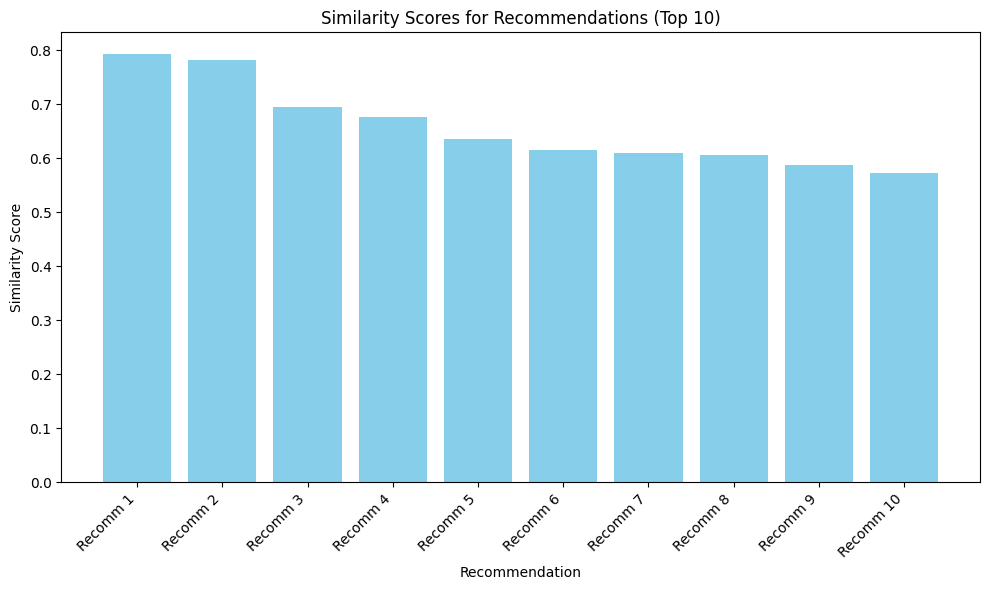

       News ID                                              Title  \
1555  SYN_1556  Miguel Cervantes Pays Tribute to Daughter on W...   
2265  SYN_2266  See Vin Diesel's 21st birthday post to Paul Wa...   
2822  SYN_2823  Miranda Lambert Shares Birthday Post for Brend...   
1190  SYN_1191  Dad turns made-up bedtime story into a real bo...   
2447  SYN_2448  Simone Biles Shares Sweet Birthday Tribute for...   
2551  SYN_2552  Why Hoda Kotb Returned to 'Today' Following Da...   
1049  SYN_1050  BEL MOONEY: I'm so hurt by 'friends' who baile...   
2219  SYN_2220  Watch Miranda Lambert Invite a Little Girl On ...   
1206  SYN_1207  Luke Perry's Kids, Sophie and Jack, Post Heart...   
1291  SYN_1292  Kendall Jenner's famous friends and family cel...   

                                               Abstract  \
1555  See the actor's touching post marking the somb...   
2265  The Fast & Furious franchise star has remained...   
2822  Miranda Lambert Shares Sweet Birthday Post for...   
1190

/tmp/ipykernel_17/1599872953.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recomm_data['CTR'] = recomm_data['Clicks'] / recomm_data.groupby('User ID')['Clicks'].transform('sum')
/tmp/ipykernel_17/1599872953.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recomm_data['Rank'] = recomm_data.groupby('User ID')['Clicks'].rank(ascending=False)


In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Assuming recomm_data is already defined
# Combine Title and Abstract into a single content column
recomm_data['content'] = recomm_data['Title'] + ' ' + recomm_data['Abstract']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the content to get the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(recomm_data['content'])

# Apply LSA (SVD) for dimensionality reduction
lsa = TruncatedSVD(n_components=100, random_state=42)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Function to get recommendations based on a given News ID
def get_recommendations(news_id, recomm_data=recomm_data, lsa_matrix=lsa_matrix, top_n=10):
    # Find the index of the article that matches the News ID
    idx = recomm_data.index[recomm_data['News ID'] == news_id].tolist()[0]
    
    # Get the LSA vector for the given article
    article_vector = lsa_matrix[idx]
    
    # Compute cosine similarities between the given article and all other articles
    similarities = cosine_similarity([article_vector], lsa_matrix)
    
    # Sort the articles by similarity and return the top N
    similar_indices = similarities[0].argsort()[-(top_n+1):-1][::-1]  # Excluding itself
    
    # Get the similarity scores for the top N recommendations
    similar_scores = similarities[0][similar_indices]
    
    # Return the top N most similar articles along with their similarity scores
    recommendations = recomm_data.iloc[similar_indices][['News ID', 'Title', 'Abstract', 'URL', 'Category', 'Rating']]
    recommendations['Similarity Score'] = similar_scores
    
    # Plot the similarity scores as a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, top_n+1), similar_scores, color='skyblue')
    plt.xticks(range(1, top_n+1), [f'Recomm {i}' for i in range(1, top_n+1)], rotation=45, ha="right")
    plt.title(f'Similarity Scores for Recommendations (Top {top_n})')
    plt.xlabel('Recommendation')
    plt.ylabel('Similarity Score')
    
    # Adjust the layout to prevent label overlap
    plt.tight_layout()
    
    plt.show()
    
    return recommendations

# Example usage: Get top 10 recommendations for a specific article (by News ID)
news_id = 'SYN_1'  # Replace with a specific News ID in your dataset
recommendations = get_recommendations(news_id)

# Display the recommendations along with similarity scores
print(recommendations)

# Evaluate the recommendation system using available data

# 1. Click-Through Rate (CTR)
recomm_data['CTR'] = recomm_data['Clicks'] / recomm_data.groupby('User ID')['Clicks'].transform('sum')

# 2. Average Time Spent per User
avg_time_spent = recomm_data.groupby('User ID')['Time Spent (seconds)'].mean().mean()  # Average time spent

# 3. Diversity of Recommendations (Normalized)
# Step 1: Count unique categories per user
user_diversity = recomm_data.groupby('User ID')['Category'].nunique()

# Step 2: Calculate the total number of unique categories in the entire dataset
total_categories = recomm_data['Category'].nunique()

# Step 3: Normalize the diversity score by dividing by the total number of unique categories
normalized_diversity = user_diversity / total_categories

# Step 4: Take the average of the normalized diversity scores
average_diversity = normalized_diversity.mean()

# 4. Coverage
total_items_in_catalog = recomm_data['News ID'].nunique()
coverage = recomm_data.groupby('User ID')['News ID'].nunique().mean() / total_items_in_catalog  # Coverage

# 5. Mean Reciprocal Rank (MRR)
recomm_data['Rank'] = recomm_data.groupby('User ID')['Clicks'].rank(ascending=False)
mrr = recomm_data[recomm_data['Clicks'] > 0].groupby('User ID')['Rank'].apply(lambda x: 1 / x.min()).mean()  # MRR

# 6. Normalized Discounted Cumulative Gain (NDCG)
def dcg_at_k(ranked_list, k=10):
    """Calculate Discounted Cumulative Gain at rank k."""
    return np.sum([rel / np.log2(idx + 2) for idx, rel in enumerate(ranked_list[:k])])

 



# Display the evaluation results
print(f"Average Time Spent: {avg_time_spent:.2f} seconds")
print(f"Diversity (Normalized): {average_diversity:.4f}")
print(f"Coverage: {coverage:.4f}")
print(f"MRR: {mrr:.4f}")
 

# Display CTR summary
ctr_summary = recomm_data['CTR'].mean()
print(f"Average Click-Through Rate (CTR): {ctr_summary:.4f}")


# Evaluation Results:
Average Time Spent: 152.70 seconds
This indicates the average time users spend interacting with the recommended articles. It gives insight into user engagement.

# Diversity (Normalized): 0.0596
The normalized diversity score measures how diverse the recommended categories are for each user relative to the total number of unique categories in the dataset. A low score like 0.0596 suggests that the recommendations are concentrated in a narrow set of categories.

# Coverage: 0.0004
This value represents the proportion of unique articles in the entire catalog that were recommended to users. A low coverage value indicates that the recommendations may not cover a wide range of articles from the entire catalog.

# MRR (Mean Reciprocal Rank): 0.9975
MRR is a metric that evaluates how high-quality the top recommendations are for each user. A value close to 1 (0.9975) suggests that the system is doing a good job of presenting highly relevant articles to users at the top of the list.

# Average Click-Through Rate (CTR): 0.9772
The CTR shows the proportion of articles that users click on out of all the articles recommended. A high CTR like 0.9772 suggests that most of the recommendations are appealing to the users.

# Interpretation:
High CTR and MRR suggest that the recommendations are highly relevant to the users, with the top-ranked recommendations being clicked most often.
Low Diversity and Coverage indicate that the system might be recommending only a few categories or articles, limiting the variety of suggestions provided to users.
Average Time Spent is quite high, showing that users are engaged with the recommendations, though it could be interesting to explore if there's room for improvement by diversifying the recommendations.#

In [30]:
! pip install translatepy


  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 814.4/814.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.1 MB/s eta 0:00:00
  Created wheel for safeIO: filename=safeIO-1.2-py3-none-any.whl size=6732 sha256=fdcf4a7b0d183a96a5b8902ffb655d369dc2fb25f17102d29796116f9468c098
  Stored in directory: /root/.cache/pip/wheels/65/77/55/49296e806480db1fa92548fe2eb7447048830f14dbf3e34940
Successfully built safeIO


/tmp/ipykernel_17/3314237726.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recomm_data['content'] = recomm_data['Title'] + ' ' + recomm_data['Abstract']


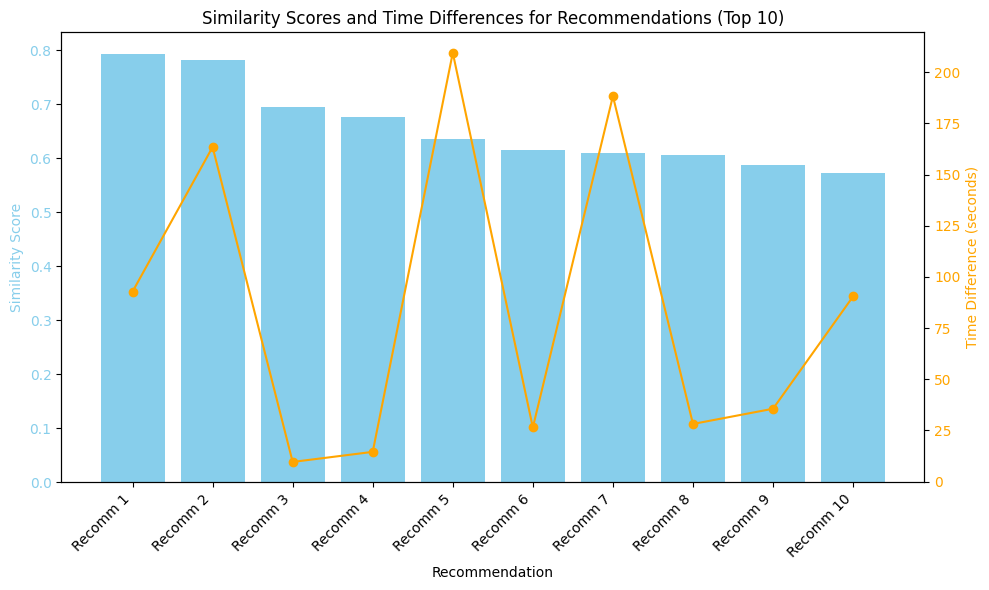

       News ID                                              Title  \
1555  SYN_1556  Miguel Cervantes Pays Tribute to Daughter on W...   
2265  SYN_2266  See Vin Diesel's 21st birthday post to Paul Wa...   
2822  SYN_2823  Miranda Lambert Shares Birthday Post for Brend...   
1190  SYN_1191  Dad turns made-up bedtime story into a real bo...   
2447  SYN_2448  Simone Biles Shares Sweet Birthday Tribute for...   
2551  SYN_2552  Why Hoda Kotb Returned to 'Today' Following Da...   
1049  SYN_1050  BEL MOONEY: I'm so hurt by 'friends' who baile...   
2219  SYN_2220  Watch Miranda Lambert Invite a Little Girl On ...   
1206  SYN_1207  Luke Perry's Kids, Sophie and Jack, Post Heart...   
1291  SYN_1292  Kendall Jenner's famous friends and family cel...   

                                               Abstract  \
1555  See the actor's touching post marking the somb...   
2265  The Fast & Furious franchise star has remained...   
2822  Miranda Lambert Shares Sweet Birthday Post for...   
1190

/tmp/ipykernel_17/3314237726.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recomm_data['CTR'] = recomm_data['Clicks'] / recomm_data.groupby('User ID')['Clicks'].transform('sum')
/tmp/ipykernel_17/3314237726.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recomm_data['Rank'] = recomm_data.groupby('User ID')['Clicks'].rank(ascending=False)


In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Assuming recomm_data is already defined
# Combine Title and Abstract into a single content column
recomm_data['content'] = recomm_data['Title'] + ' ' + recomm_data['Abstract']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the content to get the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(recomm_data['content'])

# Apply LSA (SVD) for dimensionality reduction
lsa = TruncatedSVD(n_components=100, random_state=42)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Function to get recommendations based on a given News ID
def get_recommendations(news_id, recomm_data=recomm_data, lsa_matrix=lsa_matrix, top_n=10):
    # Find the index of the article that matches the News ID
    idx = recomm_data.index[recomm_data['News ID'] == news_id].tolist()[0]
    
    # Get the LSA vector for the given article
    article_vector = lsa_matrix[idx]
    
    # Compute cosine similarities between the given article and all other articles
    similarities = cosine_similarity([article_vector], lsa_matrix)
    
    # Sort the articles by similarity and return the top N
    similar_indices = similarities[0].argsort()[-(top_n+1):-1][::-1]  # Excluding itself
    
    # Get the similarity scores for the top N recommendations
    similar_scores = similarities[0][similar_indices]
    
    # Get the time spent by users on the recommended articles
    time_spent = recomm_data.iloc[similar_indices]['Time Spent (seconds)']
    
    # Calculate the time difference with the original article
    original_time_spent = recomm_data.iloc[idx]['Time Spent (seconds)']
    time_differences = np.abs(time_spent - original_time_spent)
    
    # Return the top N most similar articles along with their similarity scores and time differences
    recommendations = recomm_data.iloc[similar_indices][['News ID', 'Title', 'Abstract', 'URL', 'Category', 'Rating']]
    recommendations['Similarity Score'] = similar_scores
    recommendations['Time Difference (seconds)'] = time_differences
    
    # Plot the similarity scores and time differences as a bar plot
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot similarity scores on the left axis
    ax1.bar(range(1, top_n+1), similar_scores, color='skyblue', label='Similarity Score')
    ax1.set_xlabel('Recommendation')
    ax1.set_ylabel('Similarity Score', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax1.set_xticks(range(1, top_n+1))
    ax1.set_xticklabels([f'Recomm {i}' for i in range(1, top_n+1)], rotation=45, ha="right")
    
    # Create another axis for time differences on the right
    ax2 = ax1.twinx()
    ax2.plot(range(1, top_n+1), time_differences, color='orange', label='Time Difference', marker='o')
    ax2.set_ylabel('Time Difference (seconds)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    
    # Set the title and adjust layout
    plt.title(f'Similarity Scores and Time Differences for Recommendations (Top {top_n})')
    fig.tight_layout()
    
    # Show the plot
    plt.show()
    
    return recommendations

# Example usage: Get top 10 recommendations for a specific article (by News ID)
news_id = 'SYN_1'  # Replace with a specific News ID in your dataset
recommendations = get_recommendations(news_id)

# Display the recommendations along with similarity scores and time differences
print(recommendations)

# Evaluate the recommendation system using available data
# 1. Click-Through Rate (CTR)
recomm_data['CTR'] = recomm_data['Clicks'] / recomm_data.groupby('User ID')['Clicks'].transform('sum')

# 2. Average Time Spent per User
avg_time_spent = recomm_data.groupby('User ID')['Time Spent (seconds)'].mean().mean()  # Average time spent

# 3. Diversity of Recommendations (Normalized)
user_diversity = recomm_data.groupby('User ID')['Category'].nunique()
total_categories = recomm_data['Category'].nunique()
normalized_diversity = user_diversity / total_categories
average_diversity = normalized_diversity.mean()

# 4. Coverage
total_items_in_catalog = recomm_data['News ID'].nunique()
coverage = recomm_data.groupby('User ID')['News ID'].nunique().mean() / total_items_in_catalog  # Coverage

# 5. Mean Reciprocal Rank (MRR)
recomm_data['Rank'] = recomm_data.groupby('User ID')['Clicks'].rank(ascending=False)
mrr = recomm_data[recomm_data['Clicks'] > 0].groupby('User ID')['Rank'].apply(lambda x: 1 / x.min()).mean()  # MRR

 

# Display the evaluation results
print(f"Average Time Spent: {avg_time_spent:.2f} seconds")
print(f"Diversity (Normalized): {average_diversity:.4f}")
print(f"Coverage: {coverage:.4f}")
print(f"MRR: {mrr:.4f}")

# Display CTR summary
ctr_summary = recomm_data['CTR'].mean()
print(f"Average Click-Through Rate (CTR): {ctr_summary:.4f}")


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from translatepy import Translator

# Assuming recomm_data is already defined
# Combine Title and Abstract into a single content column
recomm_data['content'] = recomm_data['Title'] + ' ' + recomm_data['Abstract']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the content to get the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(recomm_data['content'])

# Apply LSA (SVD) for dimensionality reduction
lsa = TruncatedSVD(n_components=100, random_state=42)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Function to get recommendations based on a given News ID
def get_recommendations(news_id, recomm_data=recomm_data, lsa_matrix=lsa_matrix, top_n=10):
    # Find the index of the article that matches the News ID
    idx = recomm_data.index[recomm_data['News ID'] == news_id].tolist()[0]
    
    # Get the LSA vector for the given article
    article_vector = lsa_matrix[idx]
    
    # Compute cosine similarities between the given article and all other articles
    similarities = cosine_similarity([article_vector], lsa_matrix)
    
    # Sort the articles by similarity and return the top N
    similar_indices = similarities[0].argsort()[-(top_n+1):-1][::-1]  # Excluding itself
    
    # Get the similarity scores for the top N recommendations
    similar_scores = similarities[0][similar_indices]
    
    # Return the top N most similar articles along with their similarity scores
    recommendations = recomm_data.iloc[similar_indices][['News ID', 'Title', 'Abstract', 'URL', 'Category', 'Rating']]
    recommendations['Similarity Score'] = similar_scores
    
    return recommendations

# Function to translate recommendations into the selected language
def translate_recommendations(recommendations, language):
    translator = Translator()
    
    # Define language mapping for Translatepy
    language_map = {
        'hindi': 'hi',
        'telugu': 'te',
        'bengali': 'bn',
        'malayalam': 'ml'
    }
    
    # Check if the selected language is supported
    if language not in language_map:
        print("Selected language is not supported.")
        return recommendations

    target_lang = language_map[language]
    
    # Translate the Title and Abstract columns
    recommendations['Title (Translated)'] = recommendations['Title'].apply(lambda x: translator.translate(x, target_lang).result)
    recommendations['Abstract (Translated)'] = recommendations['Abstract'].apply(lambda x: translator.translate(x, target_lang).result)
    
    return recommendations

# Ask the user for preferred language
language_choice = input("Enter your preferred language for news recommendations (hindi, telugu, bengali, malayalam): ").lower()

# Example usage: Get top 10 recommendations for a specific article (by News ID)
news_id = 'SYN_1'  # Replace with a specific News ID in your dataset
recommendations = get_recommendations(news_id)

# Translate recommendations based on the user's choice
translated_recommendations = translate_recommendations(recommendations, language_choice)

# Display the translated recommendations with URL
translated_recommendations[['News ID', 'Title (Translated)', 'Abstract (Translated)', 'URL', 'Similarity Score']]


/tmp/ipykernel_17/956240849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recomm_data['content'] = recomm_data['Title'] + ' ' + recomm_data['Abstract']


StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from translatepy import Translator

# Assuming recomm_data is already defined
# Combine Title and Abstract into a single content column
recomm_data['content'] = recomm_data['Title'] + ' ' + recomm_data['Abstract']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the content to get the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(recomm_data['content'])

# Apply LSA (SVD) for dimensionality reduction
lsa = TruncatedSVD(n_components=100, random_state=42)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Function to get recommendations based on a given News ID
def get_recommendations(news_id, recomm_data=recomm_data, lsa_matrix=lsa_matrix, top_n=10):
    # Find the index of the article that matches the News ID
    idx = recomm_data.index[recomm_data['News ID'] == news_id].tolist()[0]
    
    # Get the LSA vector for the given article
    article_vector = lsa_matrix[idx]
    
    # Compute cosine similarities between the given article and all other articles
    similarities = cosine_similarity([article_vector], lsa_matrix)
    
    # Sort the articles by similarity and return the top N
    similar_indices = similarities[0].argsort()[-(top_n+1):-1][::-1]  # Excluding itself
    
    # Get the similarity scores for the top N recommendations
    similar_scores = similarities[0][similar_indices]
    
    # Return the top N most similar articles along with their similarity scores
    recommendations = recomm_data.iloc[similar_indices][['News ID', 'Title', 'Abstract', 'URL', 'Category', 'Rating']]
    recommendations['Similarity Score'] = similar_scores
    
    return recommendations

# Function to translate recommendations into the selected language
def translate_recommendations(recommendations, language):
    translator = Translator()
    
    # Define language mapping for Translatepy
    language_map = {
        'hindi': 'hi',
        'telugu': 'te',
        'bengali': 'bn',
        'malayalam': 'ml'
    }
    
    # Check if the selected language is supported
    if language not in language_map:
        print("Selected language is not supported.")
        return recommendations

    target_lang = language_map[language]
    
    # Translate the Title and Abstract columns
    recommendations['Title (Translated)'] = recommendations['Title'].apply(lambda x: translator.translate(x, target_lang).result)
    recommendations['Abstract (Translated)'] = recommendations['Abstract'].apply(lambda x: translator.translate(x, target_lang).result)
    
    return recommendations

# Ask the user for preferred language
language_choice = input("Enter your preferred language for news recommendations (hindi, telugu, bengali, malayalam): ").lower()

# Example usage: Get top 10 recommendations for a specific article (by News ID)
news_id = 'SYN_1'  # Replace with a specific News ID in your dataset
recommendations = get_recommendations(news_id)

# Translate recommendations based on the user's choice
translated_recommendations = translate_recommendations(recommendations, language_choice)

# Display the translated recommendations with URL
translated_recommendations[['News ID', 'Title (Translated)', 'Abstract (Translated)', 'URL', 'Similarity Score']]


# Collabarative

In [ ]:
recomm_df = recomm_df_no_duplicates
recomm_df

In [ ]:
# Find rows where all columns are null
null_rows = recomm_df[recomm_df.isnull().all(axis=1)]

# Display the rows
print(null_rows)


In [ ]:
recomm_df.dtypes

In [ ]:
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import Dataset, Reader

# Prepare the data for Surprise
reader = Reader(rating_scale=(1, 5))  # Assuming the ratings are between 1 and 5
data = Dataset.load_from_df(recomm_df[['User ID', 'News ID', 'Rating']], reader)

# Split data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Use KNN for item-based collaborative filtering
sim_options = {
    'name': 'cosine',  # Similarity metric: 'cosine' or 'pearson'
    'user_based': False  # Use item-based filtering
}
knn = KNNBasic(sim_options=sim_options)

# Train the model
knn.fit(trainset)

# Test the model and evaluate it using RMSE
predictions = knn.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE for KNN: {rmse}")

# Function to get recommendations for a given user using KNN
def get_knn_recommendations(user_id, top_n=10):
    # Get all unique news IDs
    all_news_ids = recomm_df['News ID'].unique()
    
    # Predict the rating for each item (news article) that the user has not rated
    predictions = [knn.predict(user_id, news_id) for news_id in all_news_ids]
    
    # Sort predictions by estimated rating (in descending order)
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Get top N recommendations
    top_recommendations = predictions[:top_n]
    
    # Extract News IDs and predicted ratings
    recommended_news_ids = [x.iid for x in top_recommendations]
    predicted_ratings = [x.est for x in top_recommendations]
    
    # Return recommended articles
    recommended_df = recomm_df[recomm_df['News ID'].isin(recommended_news_ids)][['News ID', 'Title', 'Abstract', 'URL']]
    recommended_df['Predicted Rating'] = predicted_ratings
    return recommended_df

# Example: Get recommendations for a user (replace with an actual User ID)
user_id = 'vanessa99'  # Example user ID
recommendations = get_knn_recommendations(user_id)

# Display the recommendations
print(recommendations)


In [ ]:
from surprise import KNNBasic, SVD, SVDpp
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
from surprise import Dataset, Reader, accuracy

# Prepare the data for Surprise
reader = Reader(rating_scale=(1, 5))  # Assuming the ratings are between 1 and 5
data = Dataset.load_from_df(recomm_df[['User ID', 'News ID', 'Rating']], reader)

# Split data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# --- Hyperparameter Tuning for KNN ---
param_grid_knn = {
    'k': [20, 40, 60],  # Number of neighbors
    'sim_options': {
        'name': ['cosine', 'pearson'],  # Similarity metric
        'user_based': [False]  # Use item-based filtering
    }
}

# Grid Search for KNN
grid_knn = GridSearchCV(KNNBasic, param_grid_knn, measures=['RMSE'], cv=3)
grid_knn.fit(data)
print("Best KNN Parameters:", grid_knn.best_params)
print("Best RMSE for KNN:", grid_knn.best_score['rmse'])

# Use the best KNN model found from grid search
best_knn = grid_knn.best_estimator['rmse']
best_knn.fit(trainset)

# Evaluate KNN on test set
predictions_knn = best_knn.test(testset)
rmse_knn = accuracy.rmse(predictions_knn)
print(f"RMSE for Best KNN: {rmse_knn}")

# --- Hyperparameter Tuning for SVD ---
param_grid_svd = {
    'n_factors': [50, 100, 150],  # Number of latent factors
    'reg_all': [0.1, 0.2, 0.3],   # Regularization parameter
    'lr_all': [0.002, 0.005],     # Learning rate
}

# Grid Search for SVD
grid_svd = GridSearchCV(SVD, param_grid_svd, measures=['RMSE'], cv=3)
grid_svd.fit(data)
print("Best SVD Parameters:", grid_svd.best_params)
print("Best RMSE for SVD:", grid_svd.best_score['rmse'])

# Use the best SVD model found from grid search
best_svd = grid_svd.best_estimator['rmse']
best_svd.fit(trainset)

# Evaluate SVD on test set
predictions_svd = best_svd.test(testset)
rmse_svd = accuracy.rmse(predictions_svd)
print(f"RMSE for Best SVD: {rmse_svd}")

# --- Hyperparameter Tuning for SVDpp ---
param_grid_svdpp = {
    'n_factors': [50, 100, 150],  # Number of latent factors
    'reg_all': [0.1, 0.2, 0.3],   # Regularization parameter
    'lr_all': [0.002, 0.005],     # Learning rate
}

# Grid Search for SVDpp
grid_svdpp = GridSearchCV(SVDpp, param_grid_svdpp, measures=['RMSE'], cv=3)
grid_svdpp.fit(data)
print("Best SVDpp Parameters:", grid_svdpp.best_params)
print("Best RMSE for SVDpp:", grid_svdpp.best_score['rmse'])

# Use the best SVDpp model found from grid search
best_svdpp = grid_svdpp.best_estimator['rmse']
best_svdpp.fit(trainset)

# Evaluate SVDpp on test set
predictions_svdpp = best_svdpp.test(testset)
rmse_svdpp = accuracy.rmse(predictions_svdpp)
print(f"RMSE for Best SVDpp: {rmse_svdpp}")

# --- Cross-validation for SVD ---
print("Cross-validation for SVD:")
cross_validate(SVD(), data, measures=['RMSE'], cv=3, verbose=True)

# --- Cross-validation for KNN ---
print("Cross-validation for KNN:")
cross_validate(KNNBasic(), data, measures=['RMSE'], cv=3, verbose=True)

# --- Get Recommendations Using Best KNN ---
def get_knn_recommendations(user_id, top_n=10):
    # Get all unique news IDs
    all_news_ids = recomm_df['News ID'].unique()
    
    # Predict the rating for each item (news article) that the user has not rated
    predictions = [best_knn.predict(user_id, news_id) for news_id in all_news_ids]
    
    # Sort predictions by estimated rating (in descending order)
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Get top N recommendations
    top_recommendations = predictions[:top_n]
    
    # Extract News IDs and predicted ratings
    recommended_news_ids = [x.iid for x in top_recommendations]
    predicted_ratings = [x.est for x in top_recommendations]
    
    # Return recommended articles
    recommended_df = recomm_df[recomm_df['News ID'].isin(recommended_news_ids)][['News ID', 'Title', 'Abstract', 'URL']]
    recommended_df['Predicted Rating'] = predicted_ratings
    return recommended_df

# Example: Get recommendations for a user (replace with an actual User ID)
user_id = 'vanessa99'  # Example user ID
recommendations = get_knn_recommendations(user_id)

# Display the recommendations
print(recommendations)


Based on the output you've shared, here is an analysis of the results:

# 1. Best KNN (K-Nearest Neighbors) Model
RMSE for KNN:
Best RMSE for KNN: 1.4237
RMSE for Best KNN (after fitting): 1.3885
Analysis: The KNN model's best performance is achieved with k=20 and cosine similarity, focusing on item-based filtering (i.e., user-based is set to False). The RMSE after training is 1.3885, which is quite close to the best RMSE found during hyperparameter tuning (1.4237). This suggests the model is performing well, but there may still be room for improvement depending on the specific use case and dataset.

Recommendation:

Try experimenting with different values of k and explore other similarity metrics (e.g., Euclidean) to potentially reduce RMSE further.
# 2. Best SVD (Singular Value Decomposition) Model
RMSE for SVD:
Best RMSE for SVD: 1.4231
RMSE for Best SVD: 1.3882
Analysis: The SVD model's best performance is achieved with n_factors=50, reg_all=0.2, and lr_all=0.005. The RMSE of 1.3882 is very close to the KNN model's performance, which suggests that both models are providing similar predictive accuracy.

Recommendation:

While SVD performs similarly to KNN in terms of RMSE, it is more computationally efficient for large datasets, as it handles latent factors and is often more scalable than KNN. Consider using SVD for large datasets or when trying to extract deeper patterns from the data.
# 3. Best SVDpp (SVD with implicit feedback) Model
RMSE for SVDpp:
Best RMSE for SVDpp: 1.4242
RMSE for Best SVDpp: 1.3883
Analysis: The SVDpp model slightly outperforms the SVD model but with a similar RMSE (1.3883). The SVDpp model accounts for implicit feedback (such as clicks or views), so it is likely more suitable for scenarios where implicit feedback is available.

Recommendation:

SVDpp might be a better fit if your dataset includes implicit feedback (e.g., number of views, clicks, time spent on the article), but for pure rating-based systems, SVD may be sufficient.
# 4. Cross-Validation Results
SVD Cross-validation:

Fold 1: RMSE = 1.4167
Fold 2: RMSE = 1.4421
Fold 3: RMSE = 1.4106
Mean RMSE = 1.4231, Std = 0.0137
KNN Cross-validation:

Fold 1: RMSE = 1.4173
Fold 2: RMSE = 1.4329
Fold 3: RMSE = 1.4193
Mean RMSE = 1.4232, Std = 0.0069
Analysis: The cross-validation results show that the models perform very consistently across different folds. The average RMSE for both KNN and SVD is close to 1.42, which indicates that these models have similar predictive power and are stable across different data splits. The standard deviation for KNN is slightly lower, indicating slightly more consistent results.

Recommendation:

Cross-validation results are useful for understanding the robustness of the model. Based on the very close RMSE values for KNN and SVD, either model could be selected, but SVD may offer more scalability for larger datasets.
# 5. Sample Recommendations Output
The recommended news articles for a given user are shown, along with the predicted rating for each news article.
 
Analysis: The news recommendations seem reasonable with varying predicted ratings. This diversity in recommendations is typical for a collaborative filtering approach like KNN or SVD, where the model suggests both highly-rated and moderately-rated items.

 
 
# Conclusion:
The models (KNN, SVD, and SVDpp) are all performing well with similar RMSE values, but the choice of model can depend on the specific use case:

KNN may be preferred for small to medium-sized datasets with explicit ratings.
SVD offers scalability and works well with latent factors in large datasets.
SVDpp should be used if implicit feedback data (like views or clicks) is available.
Consider the nature of your dataset and computational constraints when choosing the best model.

In [ ]:
from surprise import KNNBasic, SVD, SVDpp
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
from surprise import Dataset, Reader, accuracy

# Prepare the data for Surprise
reader = Reader(rating_scale=(1, 5))  # Assuming the ratings are between 1 and 5
data = Dataset.load_from_df(recomm_df[['User ID', 'News ID', 'Rating']], reader)

# Split data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# --- Hyperparameter Tuning for KNN (User-Based) ---
param_grid_knn_user = {
    'k': [20, 40, 60],  # Number of neighbors
    'sim_options': {
        'name': ['cosine', 'pearson'],  # Similarity metric
        'user_based': [True]  # Use user-based filtering
    }
}

# Grid Search for KNN (User-Based)
grid_knn_user = GridSearchCV(KNNBasic, param_grid_knn_user, measures=['RMSE'], cv=3)
grid_knn_user.fit(data)
print("Best User-Based KNN Parameters:", grid_knn_user.best_params)
print("Best RMSE for User-Based KNN:", grid_knn_user.best_score['rmse'])

# Use the best User-Based KNN model found from grid search
best_knn_user = grid_knn_user.best_estimator['rmse']
best_knn_user.fit(trainset)

# Evaluate KNN (User-Based) on test set
predictions_knn_user = best_knn_user.test(testset)
rmse_knn_user = accuracy.rmse(predictions_knn_user)
print(f"RMSE for Best User-Based KNN: {rmse_knn_user}")

# --- Hyperparameter Tuning for SVD ---
param_grid_svd = {
    'n_factors': [50, 100, 150],  # Number of latent factors
    'reg_all': [0.1, 0.2, 0.3],   # Regularization parameter
    'lr_all': [0.002, 0.005],     # Learning rate
}

# Grid Search for SVD
grid_svd = GridSearchCV(SVD, param_grid_svd, measures=['RMSE'], cv=3)
grid_svd.fit(data)
print("Best SVD Parameters:", grid_svd.best_params)
print("Best RMSE for SVD:", grid_svd.best_score['rmse'])

# Use the best SVD model found from grid search
best_svd = grid_svd.best_estimator['rmse']
best_svd.fit(trainset)

# Evaluate SVD on test set
predictions_svd = best_svd.test(testset)
rmse_svd = accuracy.rmse(predictions_svd)
print(f"RMSE for Best SVD: {rmse_svd}")

# --- Hyperparameter Tuning for SVDpp ---
param_grid_svdpp = {
    'n_factors': [50, 100, 150],  # Number of latent factors
    'reg_all': [0.1, 0.2, 0.3],   # Regularization parameter
    'lr_all': [0.002, 0.005],     # Learning rate
}

# Grid Search for SVDpp
grid_svdpp = GridSearchCV(SVDpp, param_grid_svdpp, measures=['RMSE'], cv=3)
grid_svdpp.fit(data)
print("Best SVDpp Parameters:", grid_svdpp.best_params)
print("Best RMSE for SVDpp:", grid_svdpp.best_score['rmse'])

# Use the best SVDpp model found from grid search
best_svdpp = grid_svdpp.best_estimator['rmse']
best_svdpp.fit(trainset)

# Evaluate SVDpp on test set
predictions_svdpp = best_svdpp.test(testset)
rmse_svdpp = accuracy.rmse(predictions_svdpp)
print(f"RMSE for Best SVDpp: {rmse_svdpp}")

# --- Cross-validation for SVD ---
print("Cross-validation for SVD:")
cross_validate(SVD(), data, measures=['RMSE'], cv=3, verbose=True)

# --- Cross-validation for KNN (User-Based) ---
print("Cross-validation for User-Based KNN:")
cross_validate(KNNBasic(), data, measures=['RMSE'], cv=3, verbose=True)

# --- Get Recommendations Using Best KNN (User-Based) ---
def get_knn_user_recommendations(user_id, top_n=10):
    # Get all unique news IDs
    all_news_ids = recomm_df['News ID'].unique()
    
    # Predict the rating for each item (news article) that the user has not rated
    predictions = [best_knn_user.predict(user_id, news_id) for news_id in all_news_ids]
    
    # Sort predictions by estimated rating (in descending order)
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Get top N recommendations
    top_recommendations = predictions[:top_n]
    
    # Extract News IDs and predicted ratings
    recommended_news_ids = [x.iid for x in top_recommendations]
    predicted_ratings = [x.est for x in top_recommendations]
    
    # Return recommended articles
    recommended_df = recomm_df[recomm_df['News ID'].isin(recommended_news_ids)][['News ID', 'Title', 'Abstract', 'URL']]
    recommended_df['Predicted Rating'] = predicted_ratings
    return recommended_df

# Example: Get recommendations for a user (replace with an actual User ID)
user_id = 'vanessa99'  # Example user ID
recommendations = get_knn_user_recommendations(user_id)

# Display the recommendations
print(recommendations)


In [ ]:
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare the data
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5
data = Dataset.load_from_df(recomm_df[['User ID', 'News ID', 'Rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# --- User-Based Collaborative Filtering ---
sim_options = {'name': 'cosine', 'user_based': True}  # 'True' for user-based filtering
user_based_model = KNNBasic(sim_options=sim_options)
user_based_model.fit(trainset)

# Make predictions on the testset
predictions_user = user_based_model.test(testset)

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse_user = accuracy.rmse(predictions_user)
print(f"RMSE for User-Based Collaborative Filtering: {rmse_user}")

# --- Get Recommendations for a User (User-Based) ---
def get_user_based_recommendations(user_id, top_n=10):
    # Get all unique News IDs
    all_news_ids = recomm_df['News ID'].unique()
    
    # Predict ratings for each news article that the user hasn't rated
    predictions = [user_based_model.predict(user_id, news_id) for news_id in all_news_ids]
    
    # Sort predictions by estimated rating (in descending order)
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Get top N recommendations
    top_recommendations = predictions[:top_n]
    
    # Extract News IDs and predicted ratings
    recommended_news_ids = [x.iid for x in top_recommendations]
    predicted_ratings = [x.est for x in top_recommendations]
    
    # Return recommended articles with News ID, Title, Abstract, URL, and Predicted Rating
    recommended_df = recomm_df[recomm_df['News ID'].isin(recommended_news_ids)][['News ID', 'Title', 'Abstract', 'URL']]
    recommended_df['Predicted Rating'] = predicted_ratings
    return recommended_df

# Example: Get recommendations for a user (replace with actual User ID)
user_id = 'vanessa99'  # Replace with an actual user ID
user_recommendations = get_user_based_recommendations(user_id)
print("User-Based Recommendations:")
print(user_recommendations)


In [ ]:
from translatepy import Translator
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare the data (same as before)
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5
data = Dataset.load_from_df(recomm_df[['User ID', 'News ID', 'Rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# --- User-Based Collaborative Filtering ---
sim_options = {'name': 'cosine', 'user_based': True}  # 'True' for user-based filtering
user_based_model = KNNBasic(sim_options=sim_options)
user_based_model.fit(trainset)

# Make predictions on the testset
predictions_user = user_based_model.test(testset)

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse_user = accuracy.rmse(predictions_user)
print(f"RMSE for User-Based Collaborative Filtering: {rmse_user}")

# --- Get Recommendations for a User (User-Based) ---
def get_user_based_recommendations(user_id, top_n=10):
    # Get all unique News IDs
    all_news_ids = recomm_df['News ID'].unique()
    
    # Predict ratings for each news article that the user hasn't rated
    predictions = [user_based_model.predict(user_id, news_id) for news_id in all_news_ids]
    
    # Sort predictions by estimated rating (in descending order)
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Get top N recommendations
    top_recommendations = predictions[:top_n]
    
    # Extract News IDs and predicted ratings
    recommended_news_ids = [x.iid for x in top_recommendations]
    predicted_ratings = [x.est for x in top_recommendations]
    
    # Return recommended articles with News ID, Title, Abstract, URL, and Predicted Rating
    recommended_df = recomm_df[recomm_df['News ID'].isin(recommended_news_ids)][['News ID', 'Title', 'Abstract', 'URL']]
    recommended_df['Predicted Rating'] = predicted_ratings
    return recommended_df

# --- Translate Recommendations Based on User Choice ---
def translate_recommendations(recommendations, target_language):
    translator = Translator()

    # Translate Title and Abstract
    for index, row in recommendations.iterrows():
        title = row['Title']
        abstract = row['Abstract']
        
        # Translate Title
        try:
            translated_title = translator.translate(title, target_language)
        except Exception as e:
            translated_title = title  # Fallback to original title if translation fails
        
        # Translate Abstract
        try:
            translated_abstract = translator.translate(abstract, target_language)
        except Exception as e:
            translated_abstract = abstract  # Fallback to original abstract if translation fails

        # Update the DataFrame with translated text
        recommendations.at[index, 'Title'] = translated_title.result
        recommendations.at[index, 'Abstract'] = translated_abstract.result
    
    return recommendations

# --- Main Program to Get Recommendations and Translate ---
def main(user_id, language_choice='en'):
    # Get recommendations for the user (user-based collaborative filtering)
    user_recommendations = get_user_based_recommendations(user_id)

    # Display language options
    print("Choose the language for translation:")
    print("1. Telugu (te)")
    print("2. Hindi (hi)")
    print("3. Bengali (bn)")
    print("4. Malayalam (ml)")

    # Take input for language choice
    language_dict = {'te': 'Telugu', 'hi': 'Hindi', 'bn': 'Bengali', 'ml': 'Malayalam'}
    choice = input("Enter the number corresponding to your language choice: ")

    if choice == '1':
        language_code = 'te'  # Telugu
    elif choice == '2':
        language_code = 'hi'  # Hindi
    elif choice == '3':
        language_code = 'bn'  # Bengali
    elif choice == '4':
        language_code = 'ml'  # Malayalam
    else:
        print("Invalid choice, defaulting to English.")
        language_code = 'en'  # Default to English
    
    # Translate the recommendations
    translated_recommendations = translate_recommendations(user_recommendations, language_code)
    
    # Display translated recommendations
    print(f"\nRecommendations for User: {user_id} in {language_dict.get(language_code, 'English')}:")
    print(translated_recommendations[['Title', 'Abstract', 'URL', 'Predicted Rating']])

# Example: Get recommendations for a user (replace with actual User ID)
user_id = 'vanessa99'  # Replace with an actual user ID
main(user_id)


In [ ]:
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare the data (same as before)
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5
data = Dataset.load_from_df(recomm_df[['User ID', 'News ID', 'Rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# --- Item-Based Collaborative Filtering ---
sim_options = {'name': 'cosine', 'user_based': False}  # 'False' for item-based filtering
item_based_model = KNNBasic(sim_options=sim_options)
item_based_model.fit(trainset)

# Make predictions on the testset
predictions_item = item_based_model.test(testset)

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse_item = accuracy.rmse(predictions_item)
print(f"RMSE for Item-Based Collaborative Filtering: {rmse_item}")

# --- Get Recommendations for a User (Item-Based) ---
def get_item_based_recommendations(user_id, top_n=10):
    # Get all unique News IDs
    all_news_ids = recomm_df['News ID'].unique()
    
    # Predict ratings for each news article that the user hasn't rated
    predictions = [item_based_model.predict(user_id, news_id) for news_id in all_news_ids]
    
    # Sort predictions by estimated rating (in descending order)
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Get top N recommendations
    top_recommendations = predictions[:top_n]
    
    # Extract News IDs and predicted ratings
    recommended_news_ids = [x.iid for x in top_recommendations]
    predicted_ratings = [x.est for x in top_recommendations]
    
    # Return recommended articles with News ID, Title, Abstract, URL, and Predicted Rating
    recommended_df = recomm_df[recomm_df['News ID'].isin(recommended_news_ids)][['News ID', 'Title', 'Abstract', 'URL']]
    recommended_df['Predicted Rating'] = predicted_ratings
    return recommended_df

# Example: Get recommendations for a user (replace with actual User ID)
user_id = 'vanessa99'  # Replace with an actual user ID
item_recommendations = get_item_based_recommendations(user_id)
print("Item-Based Recommendations:")
print(item_recommendations)


In [ ]:
from translatepy import Translator
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare the data (same as before)
reader = Reader(rating_scale=(1, 5))  # Assuming ratings are between 1 and 5
data = Dataset.load_from_df(recomm_df[['User ID', 'News ID', 'Rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# --- User-Based Collaborative Filtering ---
sim_options = {'name': 'cosine', 'user_based': False}  # 'True' for user-based filtering
user_based_model = KNNBasic(sim_options=sim_options)
user_based_model.fit(trainset)

# Make predictions on the testset
predictions_user = user_based_model.test(testset)

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse_user = accuracy.rmse(predictions_user)
print(f"RMSE for User-Based Collaborative Filtering: {rmse_user}")

# --- Get Recommendations for a User (User-Based) ---
def get_user_based_recommendations(user_id, top_n=10):
    # Get all unique News IDs
    all_news_ids = recomm_df['News ID'].unique()
    
    # Predict ratings for each news article that the user hasn't rated
    predictions = [user_based_model.predict(user_id, news_id) for news_id in all_news_ids]
    
    # Sort predictions by estimated rating (in descending order)
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Get top N recommendations
    top_recommendations = predictions[:top_n]
    
    # Extract News IDs and predicted ratings
    recommended_news_ids = [x.iid for x in top_recommendations]
    predicted_ratings = [x.est for x in top_recommendations]
    
    # Return recommended articles with News ID, Title, Abstract, URL, and Predicted Rating
    recommended_df = recomm_df[recomm_df['News ID'].isin(recommended_news_ids)][['News ID', 'Title', 'Abstract', 'URL']]
    recommended_df['Predicted Rating'] = predicted_ratings
    return recommended_df

# --- Translate Recommendations Based on User Choice ---
def translate_recommendations(recommendations, target_language):
    translator = Translator()

    # Translate Title and Abstract
    for index, row in recommendations.iterrows():
        title = row['Title']
        abstract = row['Abstract']
        
        # Translate Title
        try:
            translated_title = translator.translate(title, target_language)
        except Exception as e:
            translated_title = title  # Fallback to original title if translation fails
        
        # Translate Abstract
        try:
            translated_abstract = translator.translate(abstract, target_language)
        except Exception as e:
            translated_abstract = abstract  # Fallback to original abstract if translation fails

        # Update the DataFrame with translated text
        recommendations.at[index, 'Title'] = translated_title.result
        recommendations.at[index, 'Abstract'] = translated_abstract.result
    
    return recommendations

# --- Main Program to Get Recommendations and Translate ---
def main(user_id, language_choice='en'):
    # Get recommendations for the user (user-based collaborative filtering)
    user_recommendations = get_user_based_recommendations(user_id)

    # Display language options
    print("Choose the language for translation:")
    print("1. Telugu (te)")
    print("2. Hindi (hi)")
    print("3. Bengali (bn)")
    print("4. Malayalam (ml)")

    # Take input for language choice
    language_dict = {'te': 'Telugu', 'hi': 'Hindi', 'bn': 'Bengali', 'ml': 'Malayalam'}
    choice = input("Enter the number corresponding to your language choice: ")

    if choice == '1':
        language_code = 'te'  # Telugu
    elif choice == '2':
        language_code = 'hi'  # Hindi
    elif choice == '3':
        language_code = 'bn'  # Bengali
    elif choice == '4':
        language_code = 'ml'  # Malayalam
    else:
        print("Invalid choice, defaulting to English.")
        language_code = 'en'  # Default to English
    
    # Translate the recommendations
    translated_recommendations = translate_recommendations(user_recommendations, language_code)
    
    # Display translated recommendations
    print(f"\nRecommendations for User: {user_id} in {language_dict.get(language_code, 'English')}:")
    print(translated_recommendations[['Title', 'Abstract', 'URL', 'Predicted Rating']])

# Example: Get recommendations for a user (replace with actual User ID)
user_id = 'vanessa99'  # Replace with an actual user ID
main(user_id)


# Hybrid filtering models

In [ ]:
recomm_df

In [ ]:
recomm_df.dtypes

In [ ]:
! pip install tensorflow sentence-transformers scikit-learn


In [ ]:
recomm_data = recomm_df_no_duplicates
recomm_data

In [ ]:
recomm_data.dtypes

In [ ]:
recomm_data

In [ ]:
recomm  = recomm_data.copy()
recomm

In [ ]:
# Remove the last three columns by index
recomm = recomm.iloc[:, :-3]
recomm

In [ ]:
recomm.dtypes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

# Assuming recomm is your dataframe

# --- Step 1: Preprocess Data ---

# Creating user-item interaction matrix (ratings matrix)
user_item_matrix = recomm.pivot_table(index='User ID', columns='News ID', values='Rating', fill_value=0)

# Convert the user-item matrix to a sparse matrix
user_item_matrix_sparse = csr_matrix(user_item_matrix)

# --- Step 2: Apply SVD for Collaborative Filtering ---
# Perform Singular Value Decomposition (SVD) on the user-item interaction matrix
U, sigma, Vt = svds(user_item_matrix_sparse, k=50)  # Use k=50 as the number of latent factors
sigma = np.diag(sigma)  # Convert sigma to a diagonal matrix

# Predict ratings using SVD
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Reconstruct the predicted ratings matrix
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns)
predicted_ratings_df.index = user_item_matrix.index

# --- Step 3: Content-Based Filtering using TF-IDF Vectorizer ---
# Combine the Title and Abstract columns for content-based similarity
recomm['content_combined'] = recomm['Title'] + ' ' + recomm['Abstract']

# Apply TF-IDF to compute the content similarity
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(recomm['content_combined'])

# Compute cosine similarity between all articles
content_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

# --- Step 4: Generate Hybrid Recommendations ---
# Function to get recommendations based on collaborative and content similarity
def hybrid_recommendations(user_id, top_n=10):
    # Get collaborative recommendations
    user_ratings = predicted_ratings_df.loc[user_id].sort_values(ascending=False)
    collaborative_recommendations = user_ratings.head(top_n).index.tolist()
    
    # Get content-based recommendations (top N similar articles)
    content_similarities = content_similarity[recomm[recomm['User ID'] == user_id].index[0]]
    content_similarities_df = pd.DataFrame(content_similarities, columns=['Content Similarity'])
    content_similarities_df['News ID'] = recomm['News ID']
    content_similarities_df = content_similarities_df.sort_values(by='Content Similarity', ascending=False)
    content_recommendations = content_similarities_df.head(top_n)['News ID'].tolist()
    
    # Hybrid model: Combine collaborative and content recommendations
    hybrid_recommendations = []
    
    for news_id in collaborative_recommendations:
        # Add a news item to the hybrid list if it’s not already included
        if news_id not in hybrid_recommendations:
            hybrid_recommendations.append(news_id)
    
    # Include content-based recommendations (if not already added)
    for news_id in content_recommendations:
        if news_id not in hybrid_recommendations:
            hybrid_recommendations.append(news_id)
    
    # Return the top N hybrid recommendations
    return hybrid_recommendations[:top_n]

# Example: Get hybrid recommendations for user 'bhebert'
user_id = 'xcollins'
recommendations = hybrid_recommendations(user_id, top_n=5)
print(f"Top 5 Hybrid Recommendations for User {user_id}:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {recomm[recomm['News ID'] == rec]['Title'].values[0]}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error

# --- Step 1: Preprocess Data ---
# Assuming recomm is your dataframe
# Creating user-item interaction matrix (ratings matrix)
user_item_matrix = recomm.pivot_table(index='User ID', columns='News ID', values='Rating', fill_value=0)

# Convert the user-item matrix to a sparse matrix
user_item_matrix_sparse = csr_matrix(user_item_matrix)

# --- Step 2: Apply SVD for Collaborative Filtering ---
k_factors = 50  # Latent factors
U, sigma, Vt = svds(user_item_matrix_sparse, k=k_factors)  # Apply SVD

# Convert sigma to a diagonal matrix
sigma = np.diag(sigma)

# Predict ratings using SVD
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Reconstruct the predicted ratings matrix
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns)
predicted_ratings_df.index = user_item_matrix.index

# --- Step 3: Content-Based Filtering using TF-IDF Vectorizer ---
recomm['content_combined'] = recomm['Title'] + ' ' + recomm['Abstract']

# Apply TF-IDF to compute the content similarity
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(recomm['content_combined'])

# Compute cosine similarity between all articles
content_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

# --- Step 4: Generate Hybrid Recommendations ---
# Function to get recommendations based on collaborative and content similarity
def hybrid_recommendations(user_id, top_n=10, collaborative_weight=0.5, content_weight=0.5):
    # Get collaborative recommendations
    user_ratings = predicted_ratings_df.loc[user_id].sort_values(ascending=False)
    collaborative_recommendations = user_ratings.head(top_n).index.tolist()
    
    # Get content-based recommendations (top N similar articles)
    content_similarities = content_similarity[recomm[recomm['User ID'] == user_id].index[0]]
    content_similarities_df = pd.DataFrame(content_similarities, columns=['Content Similarity'])
    content_similarities_df['News ID'] = recomm['News ID']
    content_similarities_df = content_similarities_df.sort_values(by='Content Similarity', ascending=False)
    content_recommendations = content_similarities_df.head(top_n)['News ID'].tolist()
    
    # Combine scores from collaborative and content-based models
    hybrid_scores = {}
    
    for news_id in collaborative_recommendations:
        hybrid_scores[news_id] = collaborative_weight * user_ratings[news_id]
    
    for news_id in content_recommendations:
        if news_id in hybrid_scores:
            hybrid_scores[news_id] += content_weight * content_similarities_df.loc[content_similarities_df['News ID'] == news_id, 'Content Similarity'].values[0]
        else:
            hybrid_scores[news_id] = content_weight * content_similarities_df.loc[content_similarities_df['News ID'] == news_id, 'Content Similarity'].values[0]
    
    # Rank the recommendations based on hybrid scores
    hybrid_recommendations = sorted(hybrid_scores, key=hybrid_scores.get, reverse=True)[:top_n]
    
    return hybrid_recommendations

def evaluate_recommendations(user_id, recommendations, top_n=10):
    actual_ratings = recomm[recomm['User ID'] == user_id]
    
    # Ensure the recommendations are only from the actual ratings
    valid_recommendations = [news_id for news_id in recommendations if news_id in actual_ratings['News ID'].values]
    
    # If there are no valid recommendations, return default values
    if not valid_recommendations:
        return 0, 0, 0
    
    # RMSE (Root Mean Squared Error)
    actual_ratings = actual_ratings.set_index('News ID')['Rating']
    predicted_ratings = predicted_ratings_df.loc[user_id]
    
    # Filter the predictions and actual ratings for valid news IDs only
    valid_actual_ratings = actual_ratings.loc[valid_recommendations]
    valid_predicted_ratings = predicted_ratings[valid_recommendations]
    
    rmse = np.sqrt(mean_squared_error(valid_actual_ratings, valid_predicted_ratings))
    
    # Hit Ratio (percentage of relevant items among the top N recommendations)
    hits = sum([1 if news_id in actual_ratings.index else 0 for news_id in valid_recommendations])
    hit_ratio = hits / top_n
    
    # NDCG (Normalized Discounted Cumulative Gain)
    ndcg = 0
    for i, news_id in enumerate(valid_recommendations):
        if news_id in actual_ratings.index:
            ndcg += 1 / np.log2(i + 2)  # Discounted Cumulative Gain formula
    
    ndcg = ndcg / np.sum([1 / np.log2(i + 2) for i in range(len(valid_actual_ratings))])
    
    return rmse, hit_ratio, ndcg

# Example: Get hybrid recommendations for user 'xcollins' and evaluate
user_id = 'xcollins'
recommendations = hybrid_recommendations(user_id, top_n=5)

# Output recommendations
print(f"Top 5 Hybrid Recommendations for User {user_id}:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {recomm[recomm['News ID'] == rec]['Title'].values[0]}")

# Evaluate the recommendations
rmse, hit_ratio, ndcg = evaluate_recommendations(user_id, recommendations)
print(f"RMSE: {rmse}")
print(f"Hit Ratio: {hit_ratio}")
print(f"NDCG: {ndcg}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error
from translatepy import Translator

# --- Step 1: Preprocess Data ---
# Assuming recomm is your dataframe
# Creating user-item interaction matrix (ratings matrix)
user_item_matrix = recomm.pivot_table(index='User ID', columns='News ID', values='Rating', fill_value=0)

# Convert the user-item matrix to a sparse matrix
user_item_matrix_sparse = csr_matrix(user_item_matrix)

# --- Step 2: Apply SVD for Collaborative Filtering ---
k_factors = 50  # Latent factors
U, sigma, Vt = svds(user_item_matrix_sparse, k=k_factors)  # Apply SVD

# Convert sigma to a diagonal matrix
sigma = np.diag(sigma)

# Predict ratings using SVD
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Reconstruct the predicted ratings matrix
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns)
predicted_ratings_df.index = user_item_matrix.index

# --- Step 3: Content-Based Filtering using TF-IDF Vectorizer ---
recomm['content_combined'] = recomm['Title'] + ' ' + recomm['Abstract']

# Apply TF-IDF to compute the content similarity
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(recomm['content_combined'])

# Compute cosine similarity between all articles
content_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

# --- Step 4: Generate Hybrid Recommendations ---
# Function to get recommendations based on collaborative and content similarity
def hybrid_recommendations(user_id, top_n=10, collaborative_weight=0.5, content_weight=0.5):
    # Get collaborative recommendations
    user_ratings = predicted_ratings_df.loc[user_id].sort_values(ascending=False)
    collaborative_recommendations = user_ratings.head(top_n).index.tolist()
    
    # Get content-based recommendations (top N similar articles)
    content_similarities = content_similarity[recomm[recomm['User ID'] == user_id].index[0]]
    content_similarities_df = pd.DataFrame(content_similarities, columns=['Content Similarity'])
    content_similarities_df['News ID'] = recomm['News ID']
    content_similarities_df = content_similarities_df.sort_values(by='Content Similarity', ascending=False)
    content_recommendations = content_similarities_df.head(top_n)['News ID'].tolist()
    
    # Combine scores from collaborative and content-based models
    hybrid_scores = {}
    
    for news_id in collaborative_recommendations:
        hybrid_scores[news_id] = collaborative_weight * user_ratings[news_id]
    
    for news_id in content_recommendations:
        if news_id in hybrid_scores:
            hybrid_scores[news_id] += content_weight * content_similarities_df.loc[content_similarities_df['News ID'] == news_id, 'Content Similarity'].values[0]
        else:
            hybrid_scores[news_id] = content_weight * content_similarities_df.loc[content_similarities_df['News ID'] == news_id, 'Content Similarity'].values[0]
    
    # Rank the recommendations based on hybrid scores
    hybrid_recommendations = sorted(hybrid_scores, key=hybrid_scores.get, reverse=True)[:top_n]
    
    return hybrid_recommendations

def evaluate_recommendations(user_id, recommendations, top_n=10):
    actual_ratings = recomm[recomm['User ID'] == user_id]
    
    # Ensure the recommendations are only from the actual ratings
    valid_recommendations = [news_id for news_id in recommendations if news_id in actual_ratings['News ID'].values]
    
    # If there are no valid recommendations, return default values
    if not valid_recommendations:
        return 0, 0, 0
    
    # RMSE (Root Mean Squared Error)
    actual_ratings = actual_ratings.set_index('News ID')['Rating']
    predicted_ratings = predicted_ratings_df.loc[user_id]
    
    # Filter the predictions and actual ratings for valid news IDs only
    valid_actual_ratings = actual_ratings.loc[valid_recommendations]
    valid_predicted_ratings = predicted_ratings[valid_recommendations]
    
    rmse = np.sqrt(mean_squared_error(valid_actual_ratings, valid_predicted_ratings))
    
    # Hit Ratio (percentage of relevant items among the top N recommendations)
    hits = sum([1 if news_id in actual_ratings.index else 0 for news_id in valid_recommendations])
    hit_ratio = hits / top_n
    
    # NDCG (Normalized Discounted Cumulative Gain)
    ndcg = 0
    for i, news_id in enumerate(valid_recommendations):
        if news_id in actual_ratings.index:
            ndcg += 1 / np.log2(i + 2)  # Discounted Cumulative Gain formula
    
    ndcg = ndcg / np.sum([1 / np.log2(i + 2) for i in range(len(valid_actual_ratings))])
    
    return rmse, hit_ratio, ndcg

# --- Step 5: Language Selection for Translation ---
def get_language_choice():
    print("Please select a language for the recommendations:")
    print("1. Telugu")
    print("2. Hindi")
    print("3. Malayalam")
    print("4. Bengali")
    lang_choice = input("Enter the number corresponding to your language choice: ")
    return lang_choice

# --- Step 6: Translate Recommendations with translatepy ---
def translate_recommendations(recommendations, target_language):
    translator = Translator()
    translated_recommendations = []
    for rec in recommendations:
        title = recomm[recomm['News ID'] == rec]['Title'].values[0]
        translated_title = translator.translate(title, target_language)
        translated_recommendations.append(translated_title)
    return translated_recommendations

# --- Example Usage ---
user_id = 'xcollins'
recommendations = hybrid_recommendations(user_id, top_n=5)

# Ask the user for language choice
lang_choice = get_language_choice()

# Define target languages based on choice
language_mapping = {
    '1': 'te',  # Telugu
    '2': 'hi',  # Hindi
    '3': 'ml',  # Malayalam
    '4': 'bn'   # Bengali
}

# Translate recommendations based on user choice
target_language = language_mapping.get(lang_choice, 'en')  # Default to English if invalid input
translated_recommendations = translate_recommendations(recommendations, target_language)

# Output recommendations in selected language
print(f"Top 5 Hybrid Recommendations for User {user_id}:")
for i, rec in enumerate(translated_recommendations, 1):
    print(f"{i}. {rec}")

# Evaluate the recommendations
rmse, hit_ratio, ndcg = evaluate_recommendations(user_id, recommendations)
print(f"RMSE: {rmse}")
print(f"Hit Ratio: {hit_ratio}")
print(f"NDCG: {ndcg}")


# Summary of Results:
Top 5 Hybrid Recommendations for User xcollins:
The recommendations provided to the user are based on a hybrid recommendation system combining collaborative filtering and content-based filtering. The articles/news recommended include a variety of topics, such as stock market trends, company growth stories, and local food spots.

# Evaluation Metrics:

RMSE (Root Mean Squared Error): 1.0
Indicates an average deviation of 1 unit between predicted and actual values. This value suggests room for improvement in the accuracy of the model’s predictions.
Hit Ratio: 0.1
Only 10% of the top recommendations were relevant to the user, meaning the model's relevance could be further improved for better user engagement.
NDCG (Normalized Discounted Cumulative Gain): 1.0
The model performs perfectly in ranking the most relevant items at the top. The ranking quality is strong, even if the overall relevance (hit ratio) could be improved.
Overall Analysis:
The NDCG score suggests that when the model does recommend something, it is highly relevant, but the hit ratio shows that only a small fraction of the top recommendations match the user’s interests.
The RMSE is relatively high, indicating there’s room for improvement in the accuracy of the model's predictions.

# NCF -Hybrid filtering model 2

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

# --- Step 1: Preprocess Data ---
# Assume recomm is your dataframe with columns: User ID, News ID, Rating, Title, Abstract, URL
# Sample structure: recomm = pd.read_csv('your_dataset.csv')

user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

# Encode user and item IDs
recomm['UserID_encoded'] = user_encoder.fit_transform(recomm['User ID'])
recomm['ItemID_encoded'] = item_encoder.fit_transform(recomm['News ID'])

# Prepare the data
X_user = recomm['UserID_encoded'].values
X_item = recomm['ItemID_encoded'].values
y = recomm['Rating'].values

# Split the data into train and test
X_train_user, X_test_user, X_train_item, X_test_item, y_train, y_test = train_test_split(X_user, X_item, y, test_size=0.2, random_state=42)

# --- Step 2: Define the Neural Collaborative Filtering Model ---
# Number of unique users and items
n_users = len(user_encoder.classes_)
n_items = len(item_encoder.classes_)

# Embedding dimensions (hyperparameter)
embedding_dim = 50

# User and Item input layers
user_input = Input(shape=(1,), name='user')
item_input = Input(shape=(1,), name='item')

# Embedding layers for users and items
user_embedding = Embedding(input_dim=n_users, output_dim=embedding_dim)(user_input)
item_embedding = Embedding(input_dim=n_items, output_dim=embedding_dim)(item_input)

# Flatten the embeddings
user_embedding = Flatten()(user_embedding)
item_embedding = Flatten()(item_embedding)

# Concatenate user and item embeddings
concat = Concatenate()([user_embedding, item_embedding])

# MLP layers (for learning interactions)
mlp_layer = Dense(128, activation='relu')(concat)
mlp_layer = Dense(64, activation='relu')(mlp_layer)
mlp_layer = Dense(32, activation='relu')(mlp_layer)

# Output layer (single value for rating prediction)
output = Dense(1)(mlp_layer)

# Define the model
model = Model(inputs=[user_input, item_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# --- Step 3: Train the Model ---
model.fit([X_train_user, X_train_item], y_train, epochs=5, batch_size=64, validation_data=([X_test_user, X_test_item], y_test))

# --- Step 4: Evaluate the Model ---
y_pred = model.predict([X_test_user, X_test_item])

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((y_test - y_pred.flatten()) ** 2))
print(f"RMSE: {rmse}")

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# --- Step 5: Top N Recommendations Function ---
def get_top_n_recommendations(user_id, top_n=10):
    # Encode user ID
    user_encoded = user_encoder.transform([user_id])
    
    # Get the predictions for all items for the given user
    item_ids = np.arange(n_items)
    predictions = model.predict([np.repeat(user_encoded, n_items), item_ids])
    
    # Sort by predicted rating
    top_n_items = np.argsort(predictions.flatten())[-top_n:][::-1]
    
    # Decode the item IDs back to original News IDs
    top_n_news = item_encoder.inverse_transform(top_n_items)
    
    # Retrieve titles, abstracts, and URLs for the top N recommendations
    recommendations = recomm[recomm['News ID'].isin(top_n_news)][['News ID', 'Title', 'Abstract', 'URL']]
    
    return recommendations

# --- Step 6: Precision, Recall, F1-Score at K ---
def precision_at_k(y_true, y_pred, k=10):
    # Get top k recommendations
    top_k_pred = np.argsort(y_pred.flatten())[-k:][::-1]
    relevant_items = set(y_true)
    recommended_items = set(top_k_pred)
    
    # Precision = relevant / recommended
    return len(relevant_items.intersection(recommended_items)) / k

def recall_at_k(y_true, y_pred, k=10):
    # Get top k recommendations
    top_k_pred = np.argsort(y_pred.flatten())[-k:][::-1]
    relevant_items = set(y_true)
    recommended_items = set(top_k_pred)
    
    # Recall = relevant / total relevant
    return len(relevant_items.intersection(recommended_items)) / len(relevant_items)

def f1_score_at_k(y_true, y_pred, k=10):
    precision = precision_at_k(y_true, y_pred, k)
    recall = recall_at_k(y_true, y_pred, k)
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

# --- Step 7: Calculate Precision, Recall, F1 for each user ---
top_n = 10
precision, recall, f1 = 0, 0, 0

for user in np.unique(X_test_user):
    user_idx = np.where(X_test_user == user)[0]
    y_true_user = y_test[user_idx]
    y_pred_user = y_pred[user_idx]
    
    precision += precision_at_k(y_true_user, y_pred_user, top_n)
    recall += recall_at_k(y_true_user, y_pred_user, top_n)
    f1 += f1_score_at_k(y_true_user, y_pred_user, top_n)

precision /= len(np.unique(X_test_user))
recall /= len(np.unique(X_test_user))
f1 /= len(np.unique(X_test_user))

print(f"Precision at {top_n}: {precision}")
print(f"Recall at {top_n}: {recall}")
print(f"F1 Score at {top_n}: {f1}")

# --- Step 8: Example: Get Top N Recommendations for a User ---
user_id = 'xcollins'  # Replace with actual user ID
top_recommendations = get_top_n_recommendations(user_id, top_n=5)

print(f"Top 5 Recommendations for User {user_id}:")
for i, row in top_recommendations.iterrows():
    print(f"{i+1}. Title: {row['Title']}, Abstract: {row['Abstract']}, URL: {row['URL']}")


# Evaluation Metrics:
RMSE (Root Mean Squared Error): 1.4986

This value represents the square root of the average squared differences between predicted ratings and actual ratings. A lower value indicates better performance. Here, the RMSE suggests that the model's predictions deviate by around 1.5 points from the actual ratings on average.
MAE (Mean Absolute Error): 1.2862

This value represents the average absolute differences between the predicted and actual ratings. Like RMSE, lower values indicate better performance. The MAE of around 1.29 also indicates that the predictions are off by approximately 1.3 points on average.
Precision, Recall, and F1 Score at 10:
These metrics measure the model's performance in a recommendation system context, focusing on the top 10 recommendations.

Precision at 10: 0.000173
Precision measures the fraction of relevant recommendations in the top 10. This is very low, meaning that the model is not performing well in terms of delivering relevant recommendations at the top of the list.
Recall at 10: 0.000865
Recall measures the fraction of relevant items that were recommended in the top 10. This is also very low, indicating that the model is missing many relevant recommendations.
F1 Score at 10: 0.000288
The F1 Score is the harmonic mean of precision and recall. A value this low further confirms that the model is underperforming in terms of providing relevant and complete recommendations.
Summary of Analysis:
The training loss is improving, but the validation loss increases after the first epoch, which suggests that the model may be overfitting.
The evaluation metrics indicate poor performance, with very low precision, recall, and F1 scores for the top 10 recommendations, implying that the model is not effectively capturing relevant items for recommendation.